In [1]:
import numpy as np
%matplotlib inline

import utils
import plotter
import bao_utils
from colors_labels import *

%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 200
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'xx-large',
         'axes.titlesize': 'x-large',
         'xtick.labelsize': 'x-large',
         'ytick.labelsize': 'x-large',
         'figure.autolayout': True,
         'text.usetex': False}
pylab.rcParams.update(params)

In [2]:
def plot_histogram(r_peak_arr, labels=None, colors=None, region=(85,115), r_max_true=None):
    if labels is None:
        labels = [None]*len(r_peak_arr)
    if colors is None:
        colors = [None]*len(r_peak_arr)
    hist_bins = np.linspace(region[0], region[1], 16)
    plt.figure(figsize=(10,6))
    for j, r_peaks in enumerate(r_peak_arr):
        med = np.nanmedian(r_peaks)
        hist_vals, hist_bins, _ = plt.hist(r_peaks, bins=hist_bins, histtype='step', 
                                           label=labels[j], color=colors[j])
    
    hmax = max(hist_vals)
        
    for j, r_peaks in enumerate(r_peak_arr):  
        
        dotmin = hmax*1.2
        dotspace = hmax/10.0
        r_med = np.nanmedian(r_peaks)
        r_p16 = np.nanpercentile(r_peaks, 16)
        r_p84 = np.nanpercentile(r_peaks, 84)
        
        plt.errorbar(r_med, dotmin+j*dotspace, xerr=[[r_med-r_p16], [r_p84-r_med]], fmt='o',
                       color=colors[j], markersize=4)
        
        if r_max_true is not None:
            plt.errorbar(r_max_true, dotmin-dotspace, fmt='o', color='k', markersize=4)
        
    plt.ylim(0, dotmin+dotspace*(len(r_peak_arr)*2))
        
    plt.legend()    
    plt.xlabel(r"r$_{\mathrm{peak}}$ ($h^{-1}$ Mpc)")
    plt.ylabel("counts")
             
    return plt.gca()

In [3]:
cosmo_b17 = bao_utils.get_cosmo('b17')
cosmo_patchy = bao_utils.get_cosmo('patchy')

z = 0.57
alpha_true = bao_utils.compute_alpha(z, cosmo_patchy, cosmo_b17)

0.260448 0.31000013381653335 0.04814257203879415 0.676 0.96 [0.06] 0.824 2.0328
0.258909 0.307115 0.048206 0.6777 0.9611 [] 0.8288000000000002 3.046
Truth: r_s: 151.67742739223243 D_A: 1386.2717028870238 Mpc H: 92.96723916119726 km / (Mpc s)
Fiducial: r_s: 151.63251902228856 D_A: 1388.2262919973946 Mpc H: 92.93687764109468 km / (Mpc s)
alpha: 0.998656590432877


In [4]:
Omega0_m_patchy = cosmo_patchy.Omega0_cdm + cosmo_patchy.Omega0_b
r_s = bao_utils.compute_radius_sound_horizon(Omega0_m_patchy, cosmo_patchy.Omega0_b, cosmo_patchy.h)

In [5]:
# truth same for all number densities, just choose one
cat_tag = '_L750_n1e-4_z057_patchy'
r_true, xi_true = utils.load_true(cat_tag, bias=2.0)
rpeak_guess = 100.0
bw = 2
r_peak_arr, r_points, xi_points, popt = utils.find_peaks_center([r_true], [xi_true], rpeak_guess, bws=[bw], r_widths=[8.0])
r_max_true = r_peak_arr[0][0]

plt.figure()
color = 'purple'
plt.plot(r_true, xi_true, color=color)
plt.plot(r_true, utils.quadratic(r_true, *popt), color='magenta')
plt.scatter(r_points, xi_points, marker='o', s=20, color='grey')
plt.axvline(r_max_true, color=color, label='found peak')
plt.axvline(r_s*cosmo_patchy.h, color='black', ls='--', label='true $r_s$')

plt.legend()
plt.xlim(60, 120)
plt.ylim(-0.002, 0.01)

print("True r_s:", r_s*cosmo_patchy.h)
print("Found peak:", r_max_true)

[2] [8.0]
Number of NaNs: 0 , Bottom edges: 0 , Top edges: 0 total: 0


ValueError: not enough values to unpack (expected 4, got 3)

## visualize peak fitting

Number of NaNs: 0 , Bottom edges: 0 , Top edges: 0


(-0.002, 0.01)

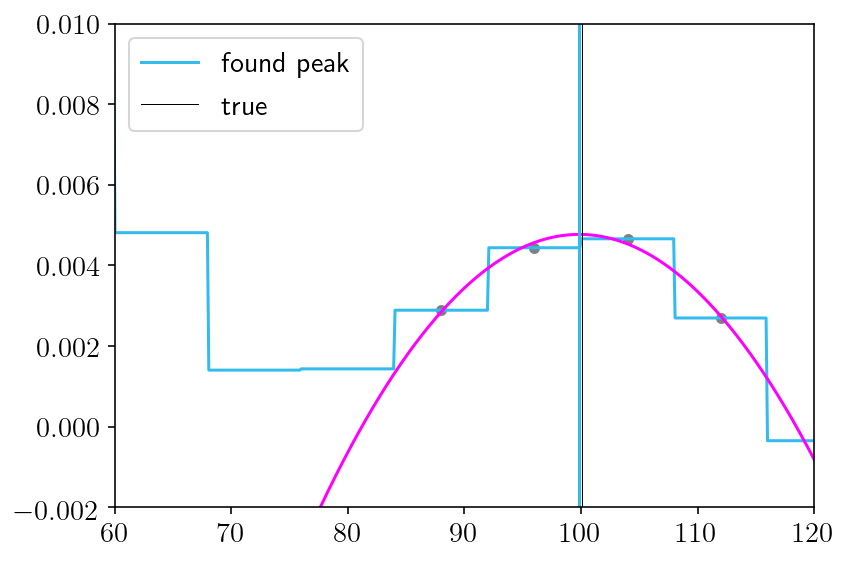

In [27]:
cat_tag = f'_L750_n2e-4_z057_patchy'
bw = 8
cf_tag = f'_tophat_bw{bw}'

n = 0 #first realization
color = ctopmany
rs, xis = utils.load_data(cat_tag, cf_tag)
rn = rs[n]
xin = xis[n]
r_peak_arr, r_points, xi_points, popt = utils.find_peaks_center([rn], [xin], rpeak_guess, bws=[bw], r_widths=[20.0])

plt.figure()
plt.plot(rn, xin, color=color)
plt.plot(rn, utils.quadratic(rn, *popt), color='magenta')
plt.scatter(r_points, xi_points, marker='o', s=20, color='grey')
plt.axvline(r_peak_arr[0], color=color, label='found peak')
plt.axvline(r_max_true, color='k', lw=0.5, label='true')
plt.legend()
plt.xlim(60, 120)
plt.ylim(-0.002, 0.01)

Number of NaNs: 0 , Bottom edges: 0 , Top edges: 0


(-0.002, 0.01)

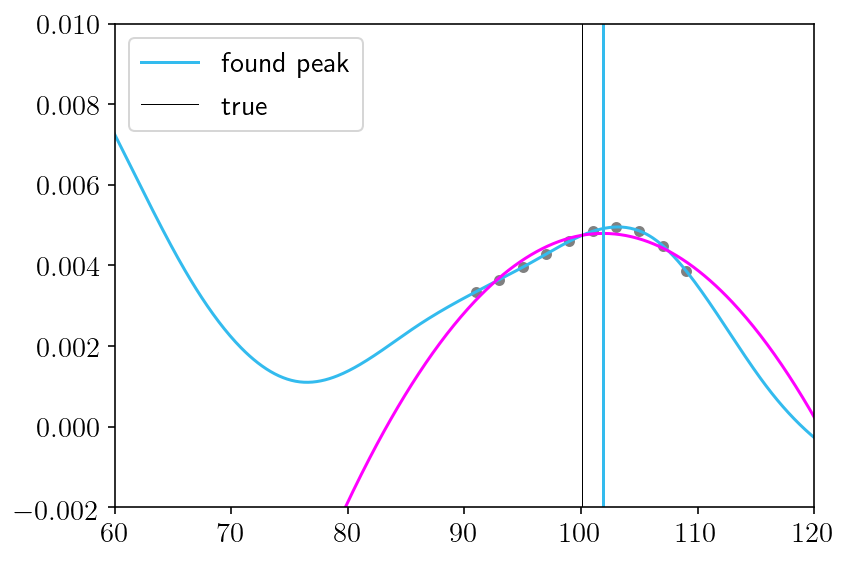

In [30]:
cat_tag = f'_L750_n2e-4_z057_patchy'
bw = 8
cf_tag = f'_spline3_bw{bw}'
bw = 2

n = 0#first realization
color = cspline
rs, xis = utils.load_data(cat_tag, cf_tag)
rn = rs[n]
xin = xis[n]
r_peak_arr, r_points, xi_points, popt = utils.find_peaks_center([rn], [xin], rpeak_guess, bws=[bw], r_widths=[10.0])

plt.figure()
plt.plot(rn, xin, color=color)
plt.plot(rn, utils.quadratic(rn, *popt), color='magenta')
plt.scatter(r_points, xi_points, marker='o', s=20, color='grey')
plt.axvline(r_peak_arr[0], color=color, label='found peak')
plt.axvline(r_max_true, color='k', lw=0.5, label='true')
plt.legend()
plt.xlim(60, 120)
plt.ylim(-0.002, 0.01)

Beware that lower num dens results are individually messes!! 

In [6]:
cat_tag = f'_L750_n1e-4_z057_patchy'
bw = 8
cf_tag = f'_tophat_bw{bw}'

n = 0 #first realization
color = ctopmany
rs, xis = utils.load_data(cat_tag, cf_tag)
rn = rs[n]
xin = xis[n]
r_peak_arr, r_points, xi_points, popt = utils.find_peaks_center([rn], [xin], rpeak_guess, bws=[bw], r_widths=[20.0])

plt.figure()
plt.plot(rn, xin, color=color)
plt.plot(rn, utils.quadratic(rn, *popt), color='magenta')
plt.scatter(r_points, xi_points, marker='o', s=20, color='grey')
plt.axvline(r_peak_arr[0], color=color, label='found peak')
plt.axvline(r_max_true, color='k', lw=0.5, label='true')
plt.legend()
plt.xlim(60, 120)
plt.ylim(-0.002, 0.01)

[8] [20.0]
Number of NaNs: 0 , Bottom edges: 0 , Top edges: 0 total: 0


ValueError: not enough values to unpack (expected 4, got 3)

Number of NaNs: 1 , Bottom edges: 0 , Top edges: 0


(-0.002, 0.01)

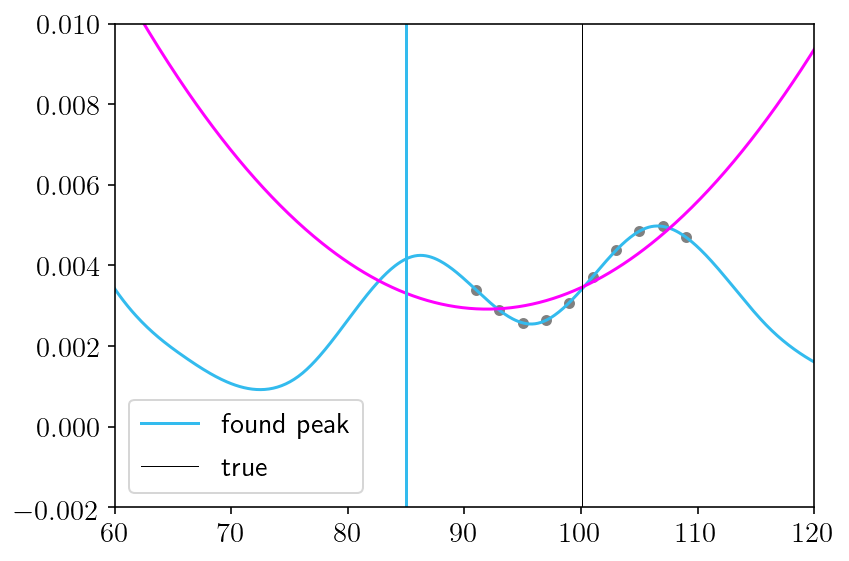

In [31]:
cat_tag = f'_L750_n1e-4_z057_patchy'
bw = 8
cf_tag = f'_spline3_bw{bw}'
bw = 2

n = 0#first realization
color = cspline
rs, xis = utils.load_data(cat_tag, cf_tag)
rn = rs[n]
xin = xis[n]
r_peak_arr, r_points, xi_points, popt = utils.find_peaks_center([rn], [xin], rpeak_guess, bws=[bw], r_widths=[10.0])

plt.figure()
plt.plot(rn, xin, color=color)
plt.plot(rn, utils.quadratic(rn, *popt), color='magenta')
plt.scatter(r_points, xi_points, marker='o', s=20, color='grey')
plt.axvline(r_peak_arr[0], color=color, label='found peak')
plt.axvline(r_max_true, color='k', lw=0.5, label='true')
plt.legend()
plt.xlim(60, 120)
plt.ylim(-0.002, 0.01)

## check out results of peak fitting

In [103]:
cat_tag = f'_L750_n1e-4_z057_patchy'
cf_tags = ['_tophat_bw8', '_spline3_bw8', '_baoiter_cosmob17_adaptive2']
colors = [ctopmany, cspline, cbao]
labels = [ct[1:] for ct in cf_tags]

r_arr = []
xi_arr = []
for i, cf_tag in enumerate(cf_tags):
    rs, xis = utils.load_data(cat_tag, cf_tag)
    r_arr.append(rs)
    xi_arr.append(xis)

Number converged: 1000/1000


[12, 4, 4] [19.0, 14.0, 14.0]
Number of NaNs: 89 , Bottom edges: 52 , Top edges: 8 total: 149
Number of NaNs: 38 , Bottom edges: 44 , Top edges: 5 total: 87
Number of NaNs: 69 , Bottom edges: 37 , Top edges: 10 total: 116


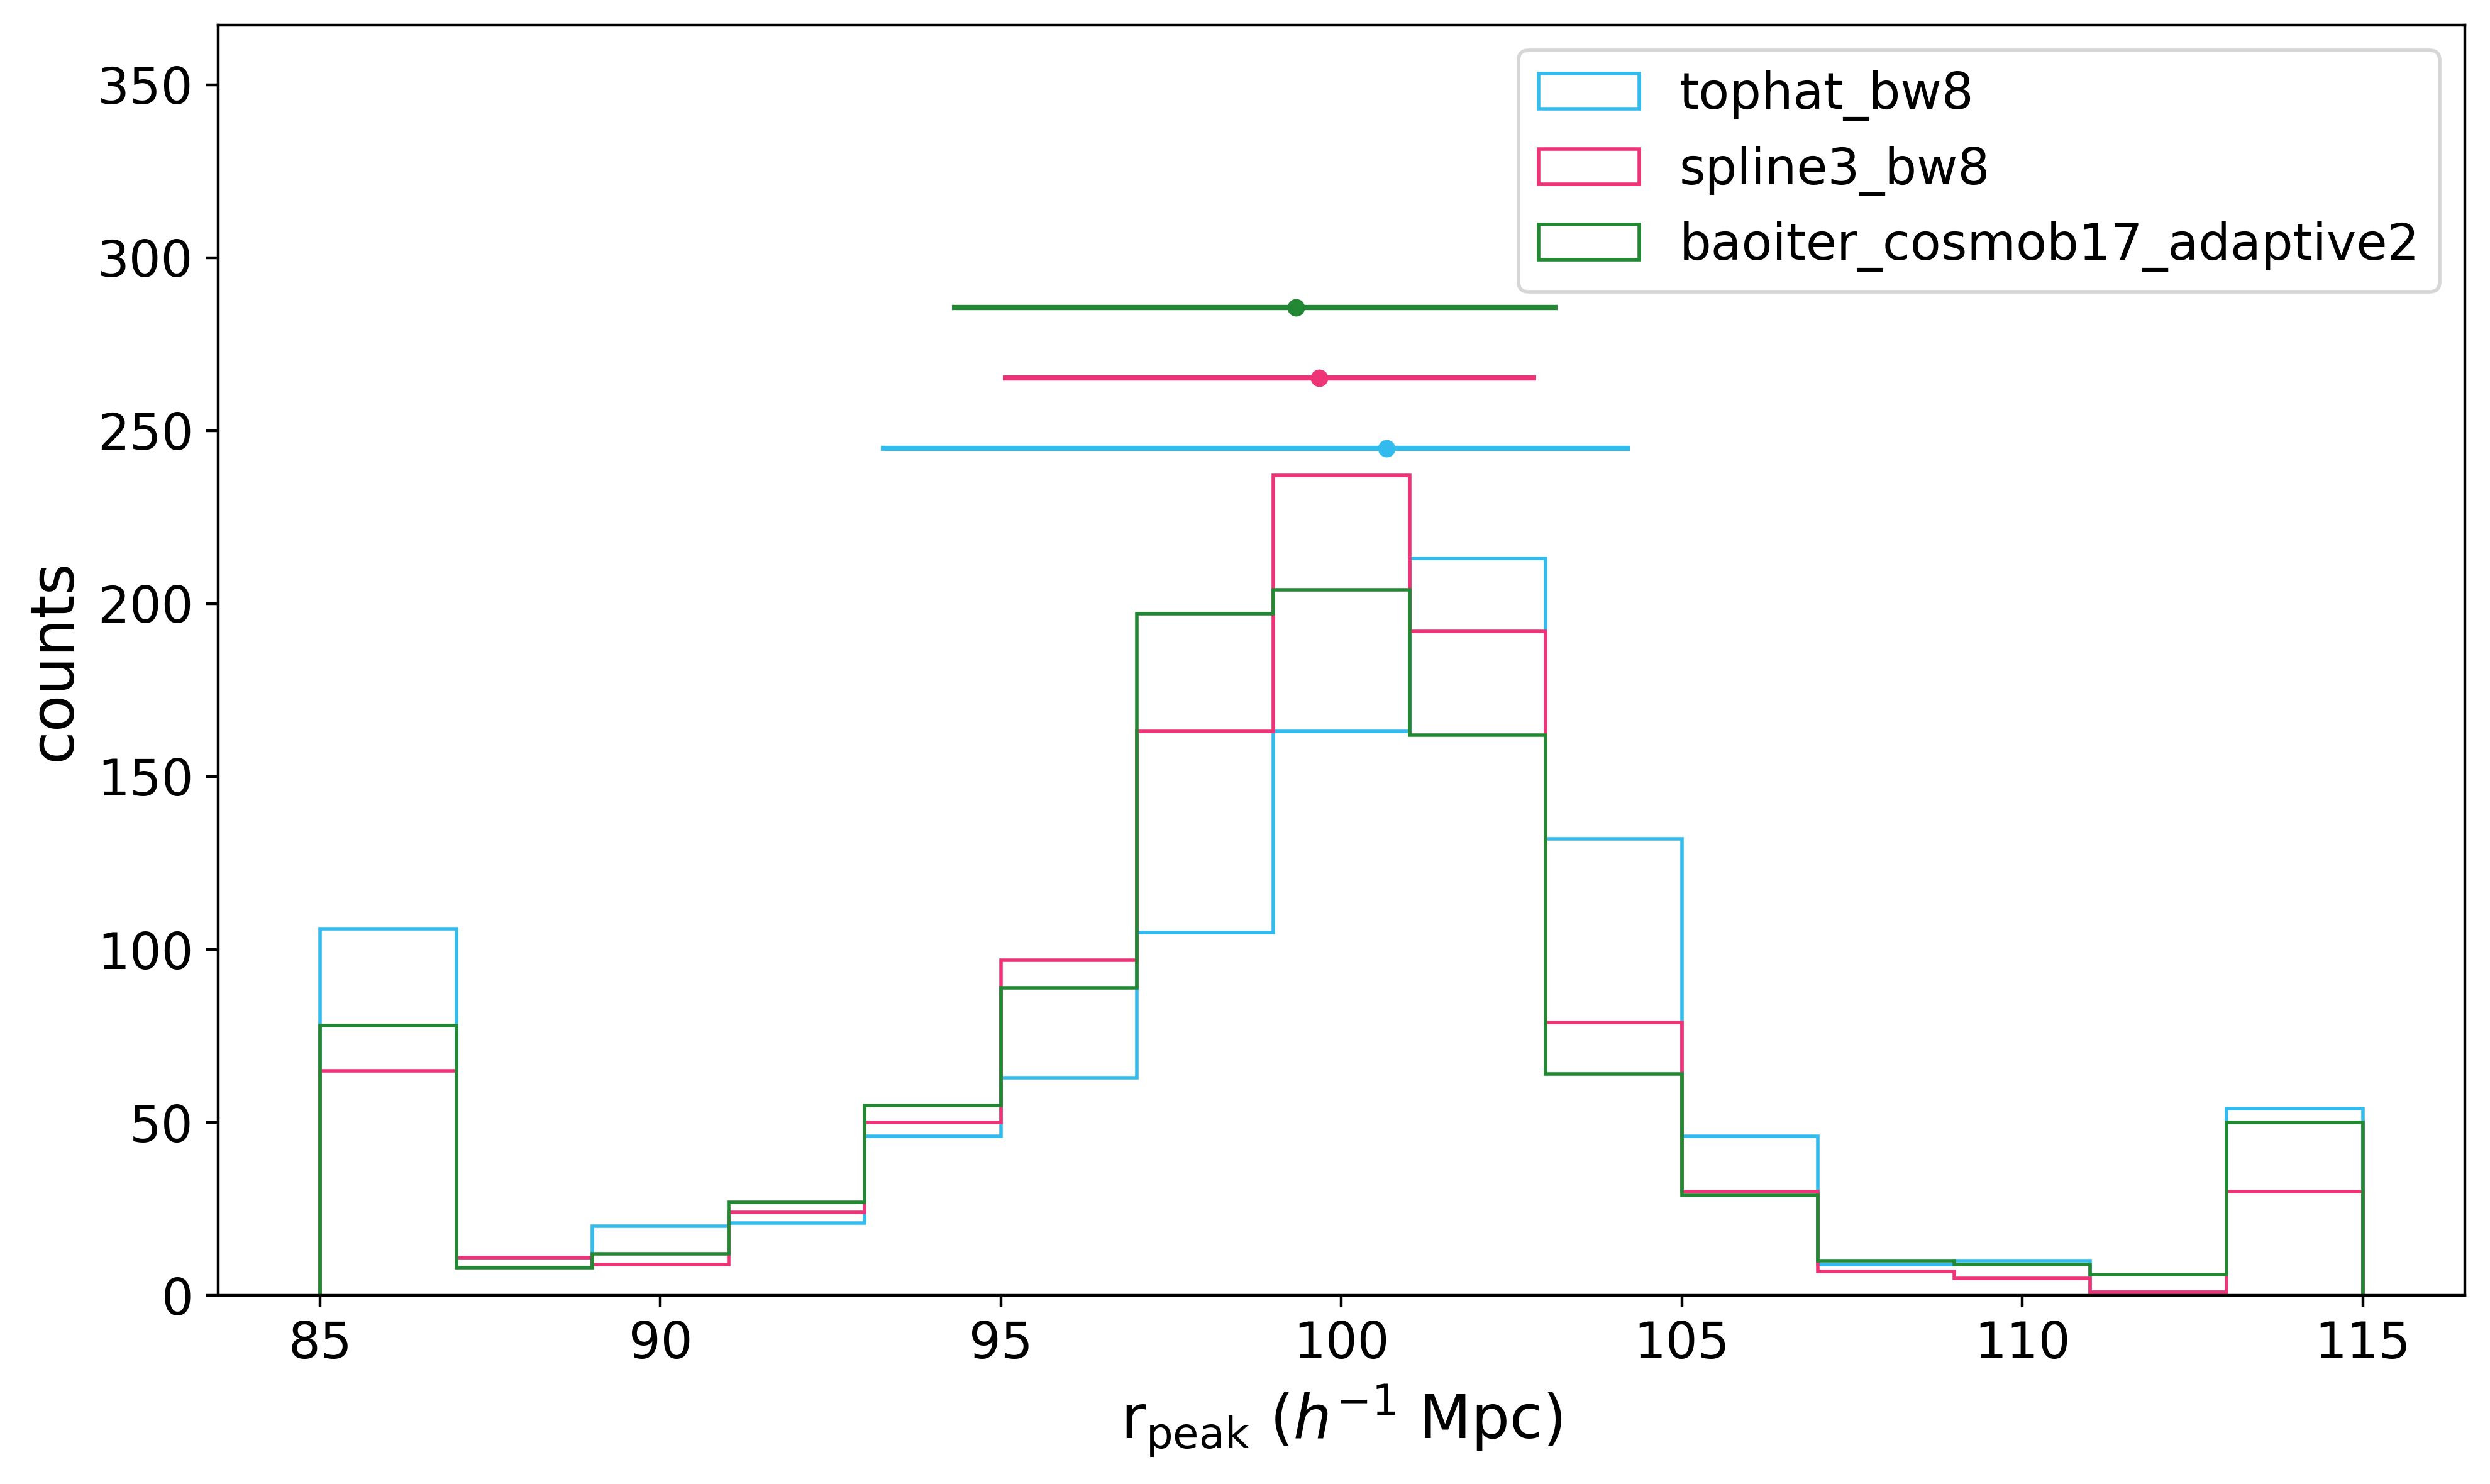

In [104]:
bws=[12, 4, 4]
r_widths = [19., 14., 14.]
r_peak_arr, *_ = utils.find_peaks_center(r_arr, xi_arr, r_max_true, bws=bws, r_widths=r_widths, show_bad=False)
ax = plot_histogram(r_peak_arr, labels=labels, colors=colors)

Ok this isn't bad. But let's figure out the best parameters for bw and rwidth for our continuous functions; by best we mean minimizing the number of NaNs and estimations that hit the edge of the reasonable range.

In [98]:
cat_tag = f'_L750_n2e-4_z057_patchy'
cf_tags = ['_spline3_bw8']
colors = [ctopmany, cspline, cbao]
labels = [ct[1:] for ct in cf_tags]

r_arr = []
xi_arr = []
for i, cf_tag in enumerate(cf_tags):
    rs, xis = utils.load_data(cat_tag, cf_tag)
    r_arr.append(rs)
    xi_arr.append(xis)

In [99]:
bws=[2, 4, 6, 8]
r_widths = [8, 10, 12, 14, 16]
n_bad = np.zeros((len(bws), len(r_widths), 3))
for i, bw in enumerate(bws):
    for j, r_width in enumerate(r_widths):
        if bw>=r_width:
            continue
        try:
            r_peak_arr, n_nans, n_botedge, n_topedge = utils.find_peaks_center(r_arr, xi_arr, r_max_true, bws=[bw], r_widths=[r_width], show_bad=False)
            n_bad[i][j] = (n_nans, n_botedge, n_topedge)
        except AssertionError:
            n_bad[i][j] = (0, 0, 0)

[2] [8]
Number of NaNs: 25 , Bottom edges: 11 , Top edges: 19 total: 55
[2] [10]
Number of NaNs: 20 , Bottom edges: 12 , Top edges: 9 total: 41
[2] [12]
Number of NaNs: 16 , Bottom edges: 13 , Top edges: 3 total: 32
[2] [14]
Number of NaNs: 11 , Bottom edges: 15 , Top edges: 4 total: 30
[2] [16]
Number of NaNs: 9 , Bottom edges: 19 , Top edges: 2 total: 30
[4] [8]
Number of NaNs: 26 , Bottom edges: 11 , Top edges: 26 total: 63
[4] [10]
Number of NaNs: 6 , Bottom edges: 26 , Top edges: 0 total: 32
[4] [12]
Number of NaNs: 16 , Bottom edges: 14 , Top edges: 4 total: 34
[4] [14]
Number of NaNs: 5 , Bottom edges: 18 , Top edges: 0 total: 23
[4] [16]
Number of NaNs: 9 , Bottom edges: 19 , Top edges: 3 total: 31
[6] [8]
Number of NaNs: 71 , Bottom edges: 10 , Top edges: 31 total: 112
[6] [10]
Number of NaNs: 71 , Bottom edges: 10 , Top edges: 31 total: 112
[6] [12]
Number of NaNs: 5 , Bottom edges: 23 , Top edges: 0 total: 28
[6] [14]
Number of NaNs: 20 , Bottom edges: 17 , Top edges: 4 tota

([<matplotlib.axis.YTick at 0x7fb1bc50db00>,
 <a list of 5 Text yticklabel objects>)

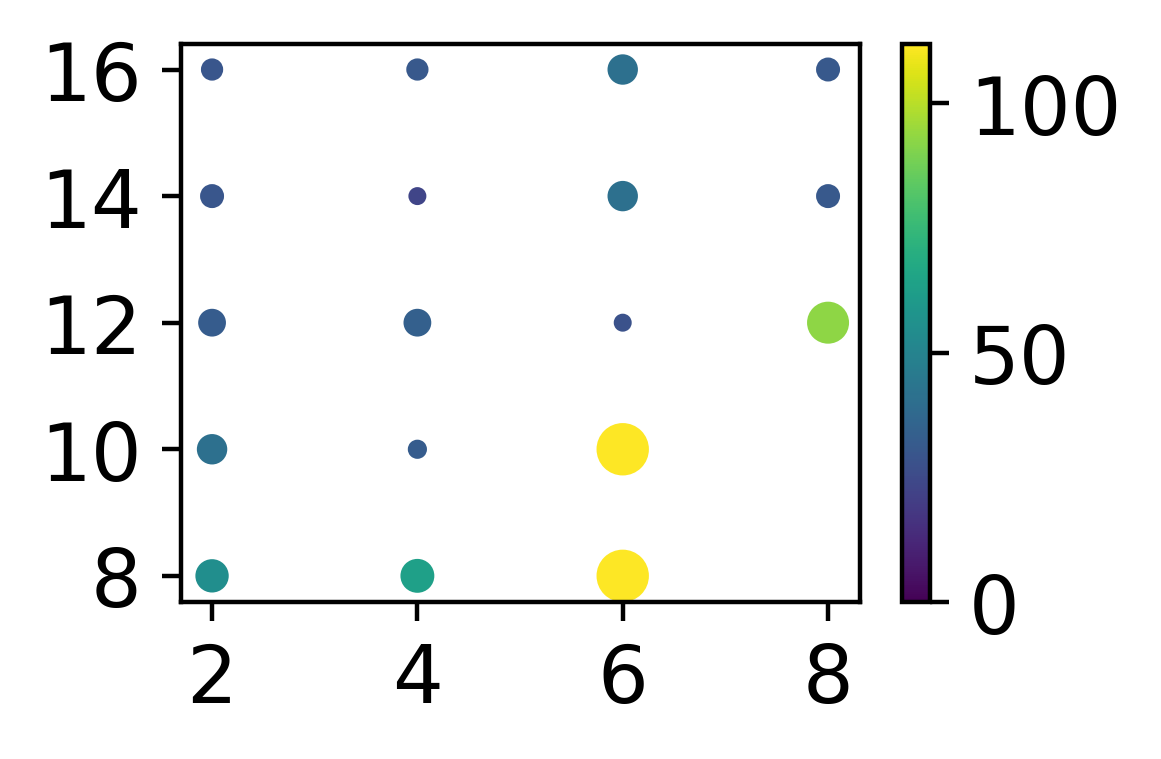

In [91]:
plt.figure(figsize=(3,2))

bw_vals = []
r_width_vals = []
bad_vals = []
nan_vals = []
for i, bw in enumerate(bws):
    for j, r_width in enumerate(r_widths):
        
        bad = np.sum(n_bad[i][j])
        nan = np.sum(n_bad[i][j][0])
        bw_vals.append(bw)
        r_width_vals.append(r_width)
        bad_vals.append(bad)
        nan_vals.append(nan)
        
scat = plt.scatter(bw_vals, r_width_vals, c=bad_vals, s=nan_vals)

fig = plt.gcf()
fig.colorbar(scat)

plt.xticks(bws)
plt.yticks(r_widths)

[6] [12]
Number of NaNs: 5 , Bottom edges: 23 , Top edges: 0 total: 28


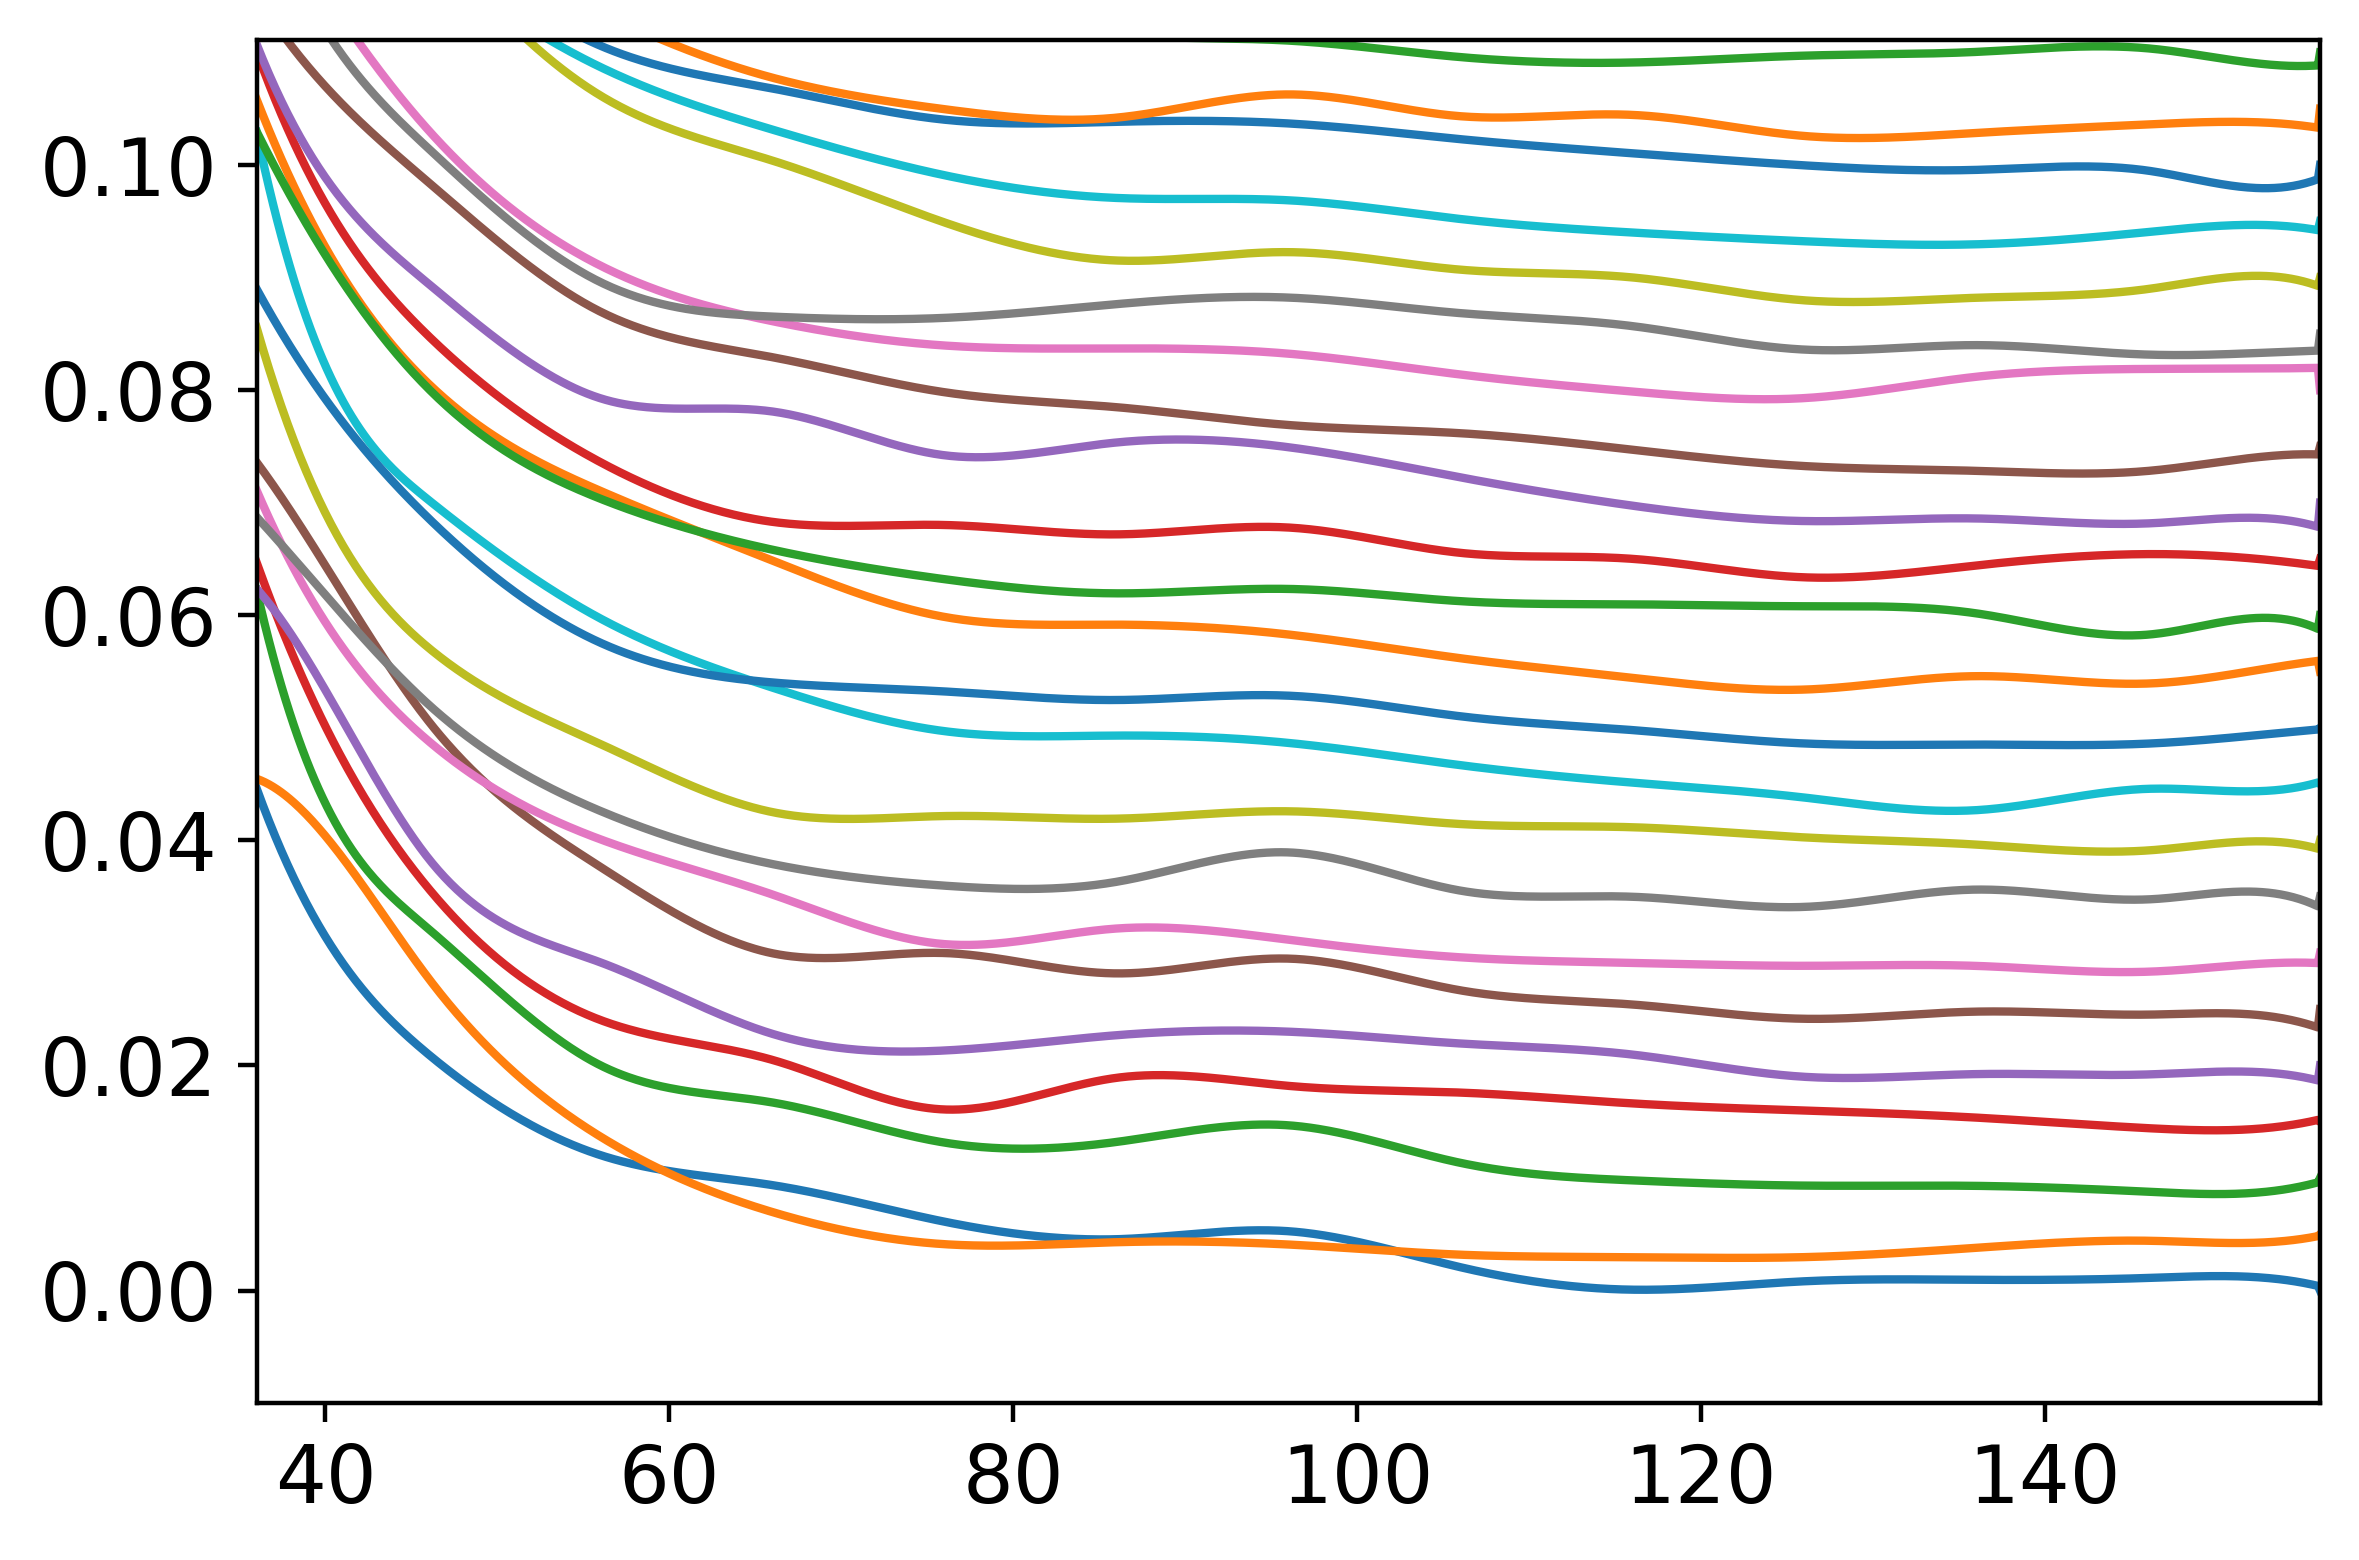

In [101]:
bws = [6]
r_widths = [12]
r_peak_arr, *_ = utils.find_peaks_center(r_arr, xi_arr, r_max_true, bws=bws, r_widths=r_widths, show_bad=True)

[2] [16]
Number of NaNs: 9 , Bottom edges: 19 , Top edges: 2 total: 30


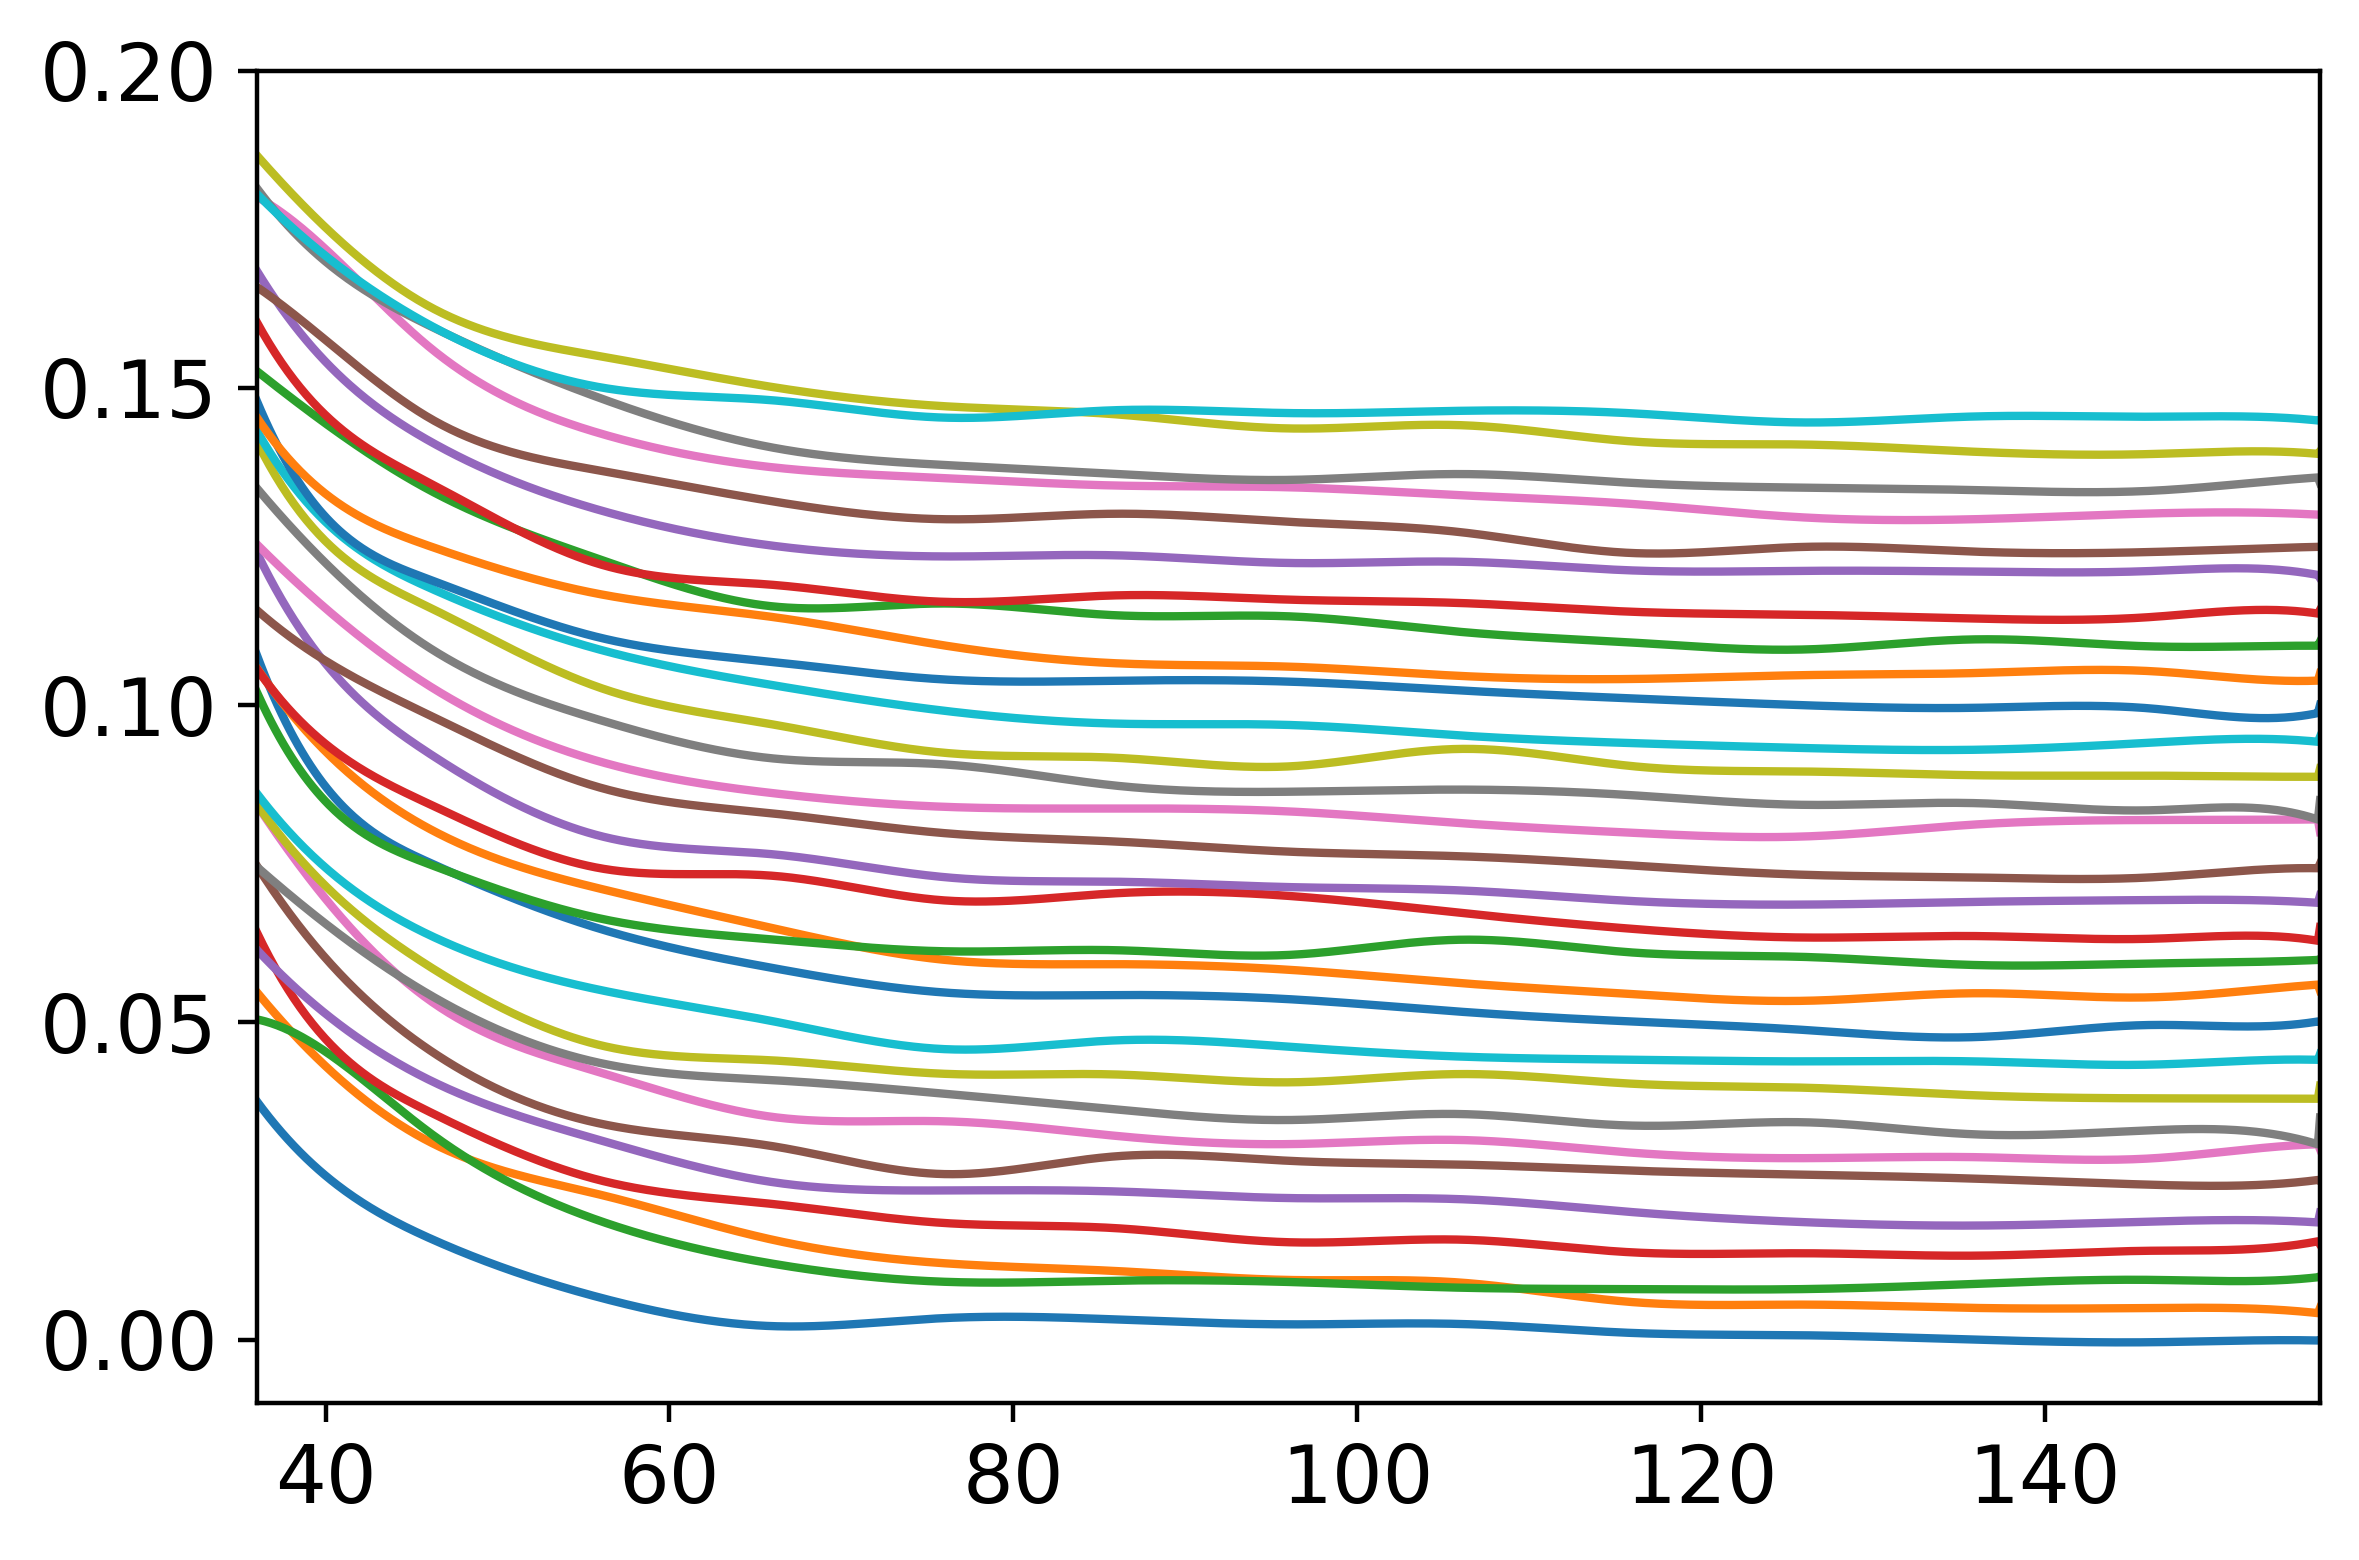

In [102]:
bws = [2]
r_widths = [16]
r_peak_arr, *_ = utils.find_peaks_center(r_arr, xi_arr, r_max_true, bws=bws, r_widths=r_widths, show_bad=True)

[4] [12]
Number of NaNs: 16 , Bottom edges: 14 , Top edges: 4


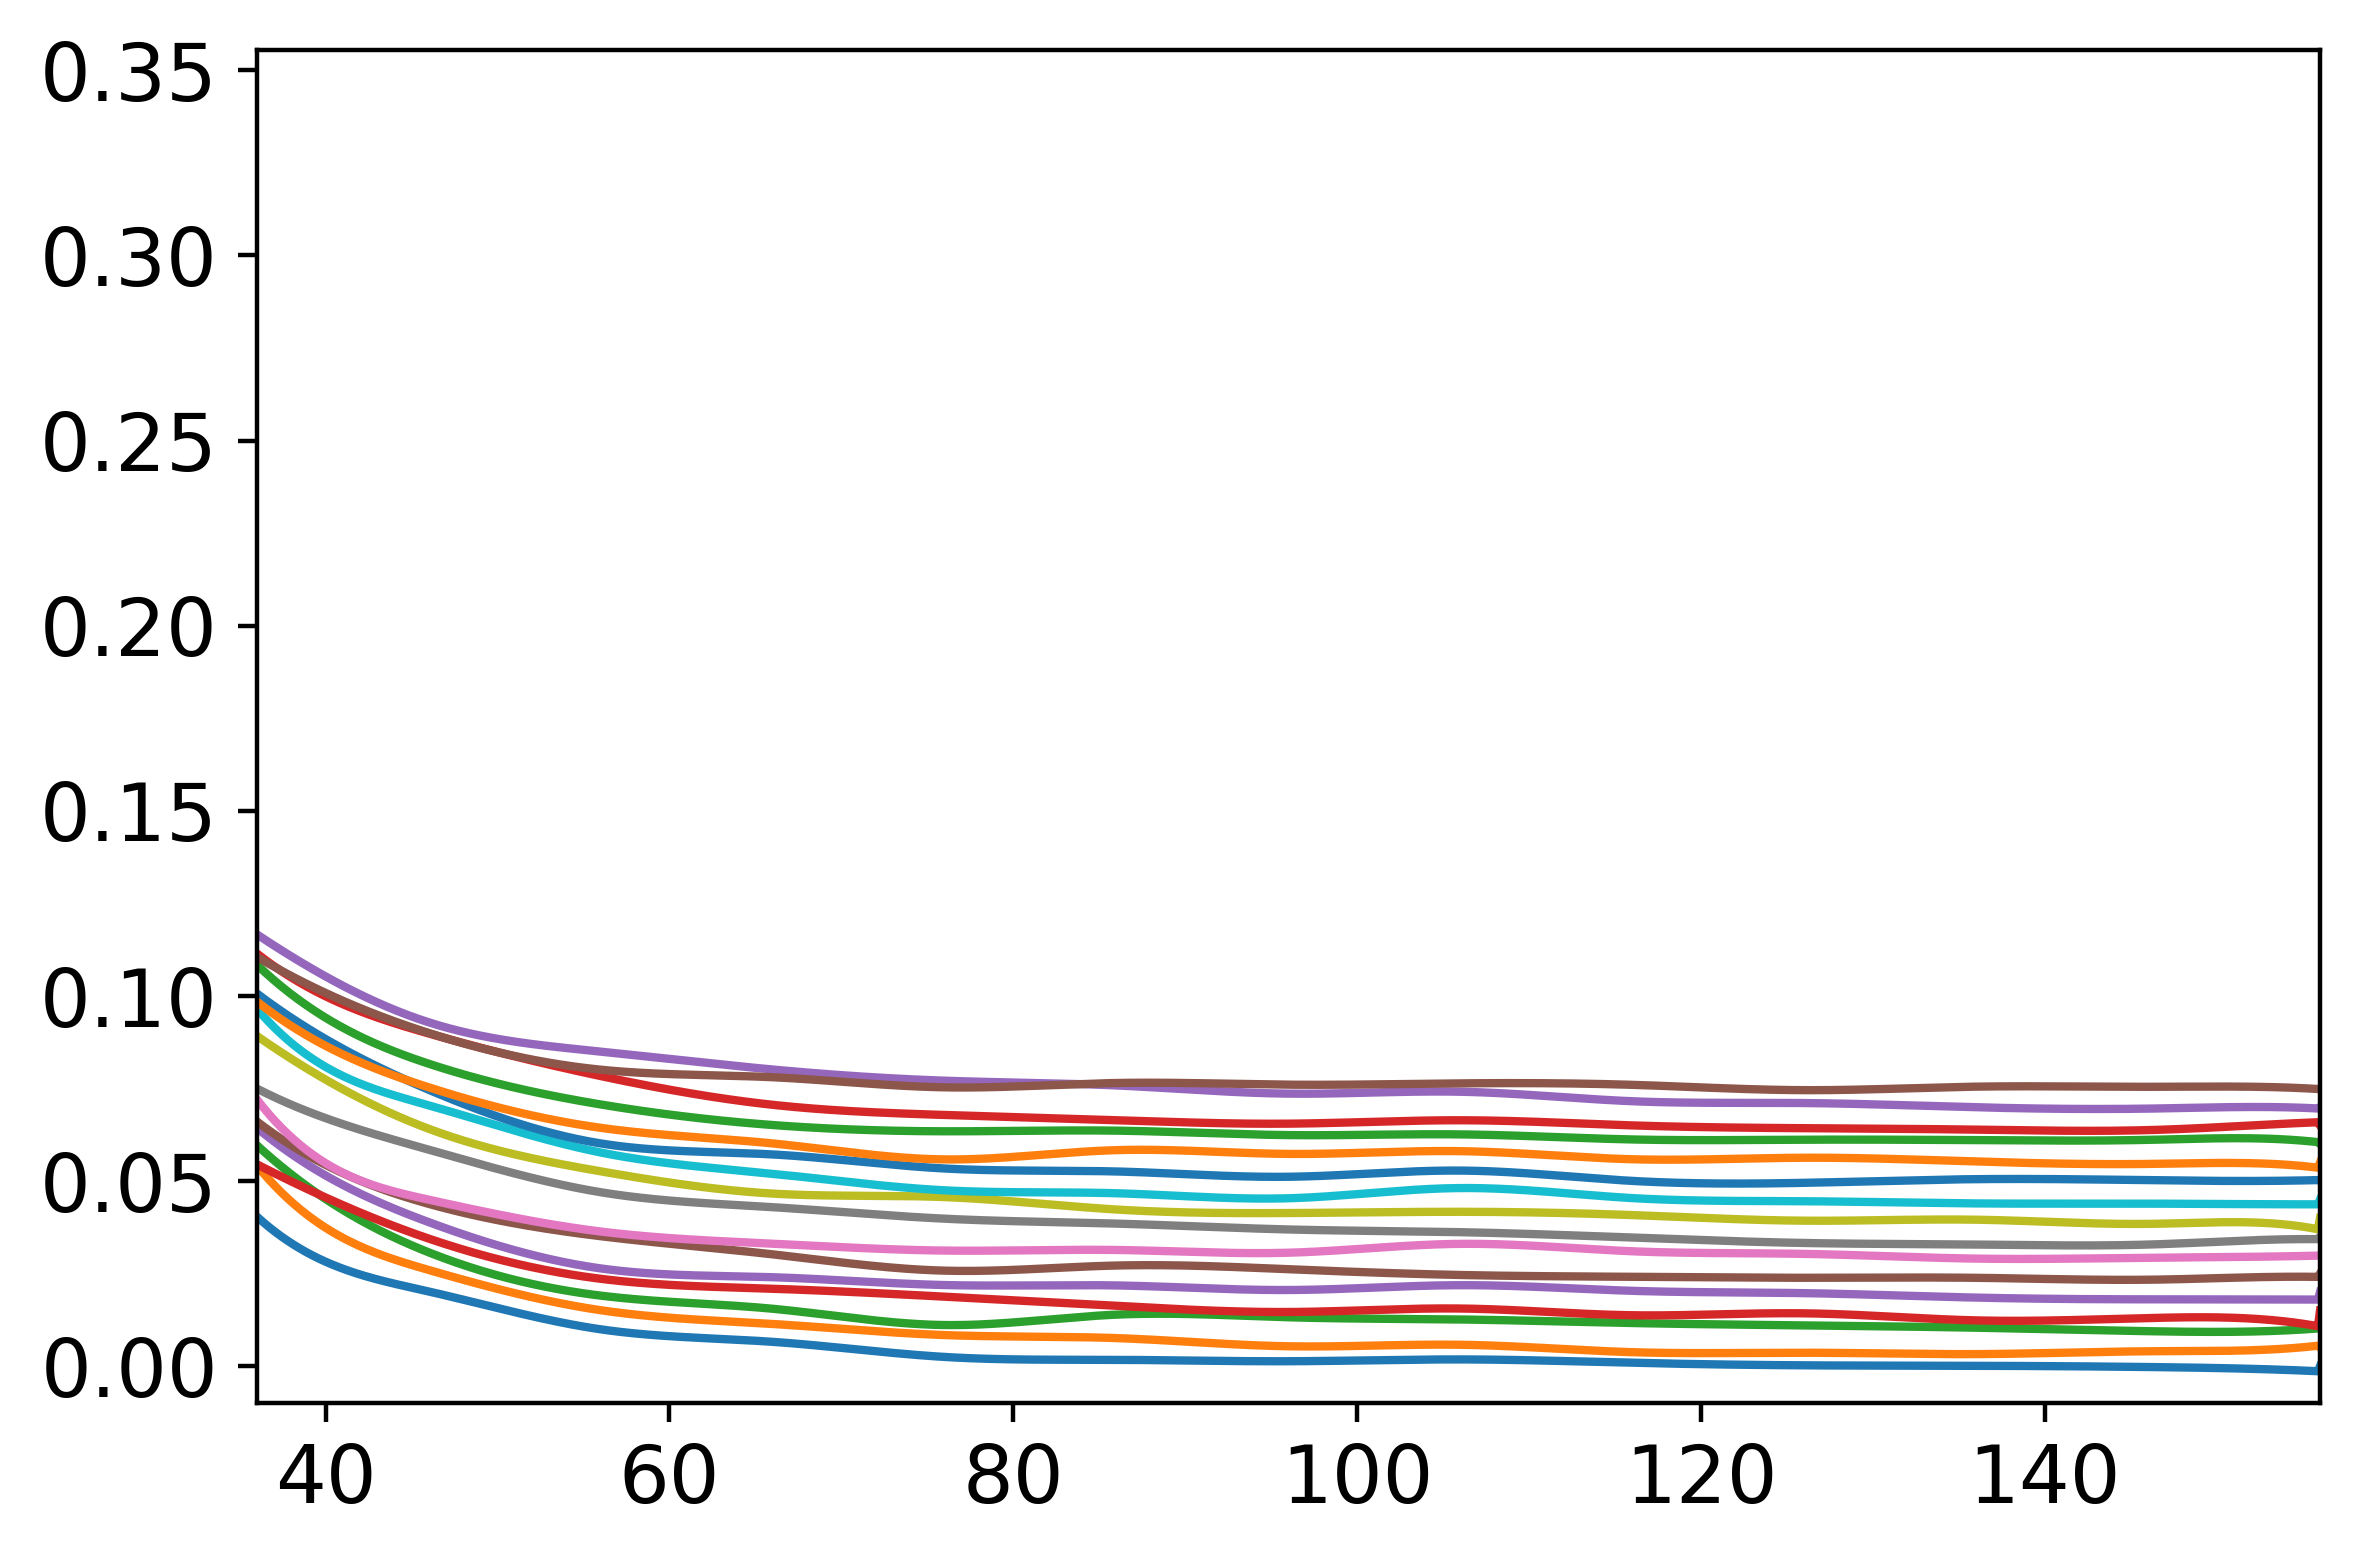

In [95]:
bws = [4]
r_widths = [12]
r_peak_arr, *_ = utils.find_peaks_center(r_arr, xi_arr, r_max_true, bws=bws, r_widths=r_widths, show_bad=True)

Try for BAO:

In [107]:
cat_tag = f'_L750_n2e-4_z057_patchy'
cf_tags = ['_baoiter_cosmob17_adaptive2']
colors = [ctopmany, cspline, cbao]
labels = [ct[1:] for ct in cf_tags]

r_arr = []
xi_arr = []
for i, cf_tag in enumerate(cf_tags):
    rs, xis = utils.load_data(cat_tag, cf_tag)
    r_arr.append(rs)
    xi_arr.append(xis)

Number converged: 1000/1000


In [108]:
bws=[2, 4, 6, 8]
r_widths = [8, 10, 12, 14, 16]
n_bad = np.zeros((len(bws), len(r_widths), 3))
for i, bw in enumerate(bws):
    for j, r_width in enumerate(r_widths):
        if bw>=r_width:
            continue
        try:
            r_peak_arr, n_nans, n_botedge, n_topedge = utils.find_peaks_center(r_arr, xi_arr, r_max_true, bws=[bw], r_widths=[r_width], show_bad=False)
            n_bad[i][j] = (n_nans, n_botedge, n_topedge)
        except AssertionError:
            n_bad[i][j] = (0, 0, 0)

[2] [8]
Number of NaNs: 46 , Bottom edges: 15 , Top edges: 28 total: 89
[2] [10]
Number of NaNs: 41 , Bottom edges: 16 , Top edges: 27 total: 84
[2] [12]
Number of NaNs: 38 , Bottom edges: 17 , Top edges: 17 total: 72
[2] [14]
Number of NaNs: 32 , Bottom edges: 21 , Top edges: 17 total: 70
[2] [16]
Number of NaNs: 27 , Bottom edges: 29 , Top edges: 16 total: 72
[4] [8]
Number of NaNs: 50 , Bottom edges: 13 , Top edges: 28 total: 91
[4] [10]
Number of NaNs: 32 , Bottom edges: 16 , Top edges: 16 total: 64
[4] [12]
Number of NaNs: 38 , Bottom edges: 17 , Top edges: 19 total: 74
[4] [14]
Number of NaNs: 24 , Bottom edges: 24 , Top edges: 7 total: 55
[4] [16]
Number of NaNs: 28 , Bottom edges: 24 , Top edges: 15 total: 67
[6] [8]
Number of NaNs: 65 , Bottom edges: 8 , Top edges: 38 total: 111
[6] [10]
Number of NaNs: 65 , Bottom edges: 8 , Top edges: 38 total: 111
[6] [12]
Number of NaNs: 27 , Bottom edges: 22 , Top edges: 11 total: 60
[6] [14]
Number of NaNs: 45 , Bottom edges: 18 , Top ed

([<matplotlib.axis.YTick at 0x7fb19058ba90>,
 <a list of 5 Text yticklabel objects>)

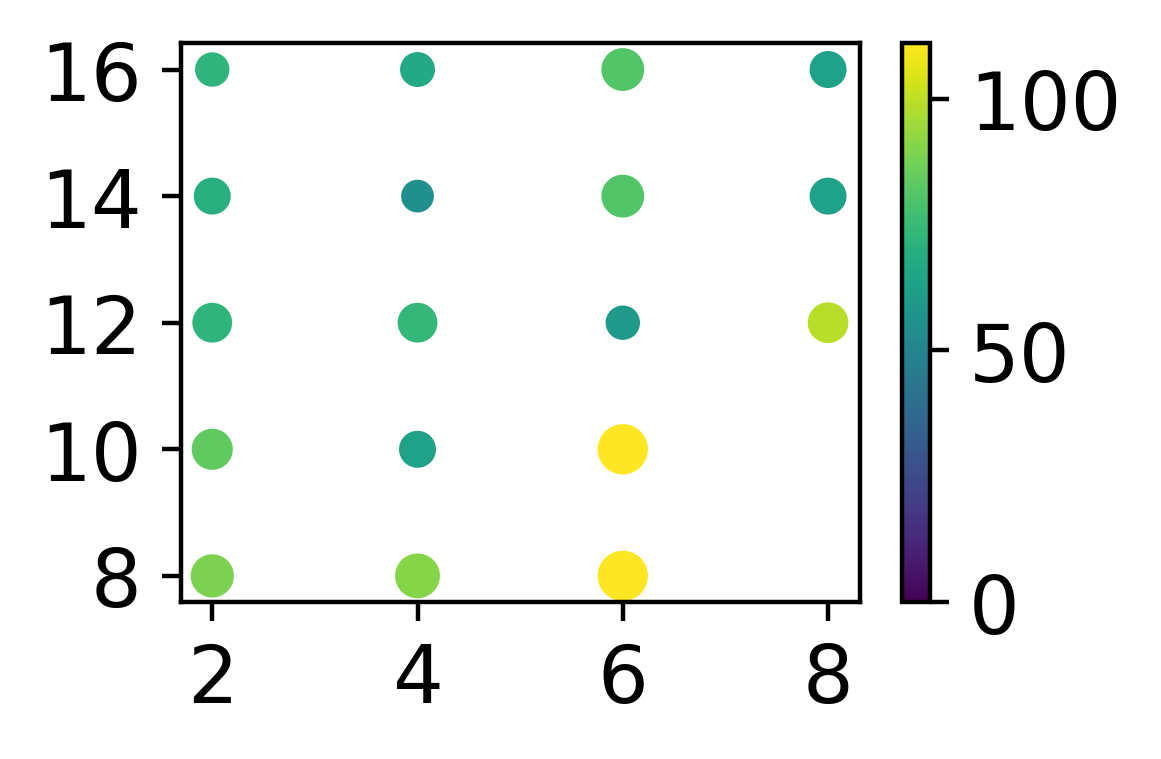

In [109]:
plt.figure(figsize=(3,2))

bw_vals = []
r_width_vals = []
bad_vals = []
nan_vals = []
for i, bw in enumerate(bws):
    for j, r_width in enumerate(r_widths):
        
        bad = np.sum(n_bad[i][j])
        nan = np.sum(n_bad[i][j][0])
        bw_vals.append(bw)
        r_width_vals.append(r_width)
        bad_vals.append(bad)
        nan_vals.append(nan)
        
scat = plt.scatter(bw_vals, r_width_vals, c=bad_vals, s=nan_vals)

fig = plt.gcf()
fig.colorbar(scat)

plt.xticks(bws)
plt.yticks(r_widths)

[4] [14]
Number of NaNs: 24 , Bottom edges: 24 , Top edges: 7 total: 55


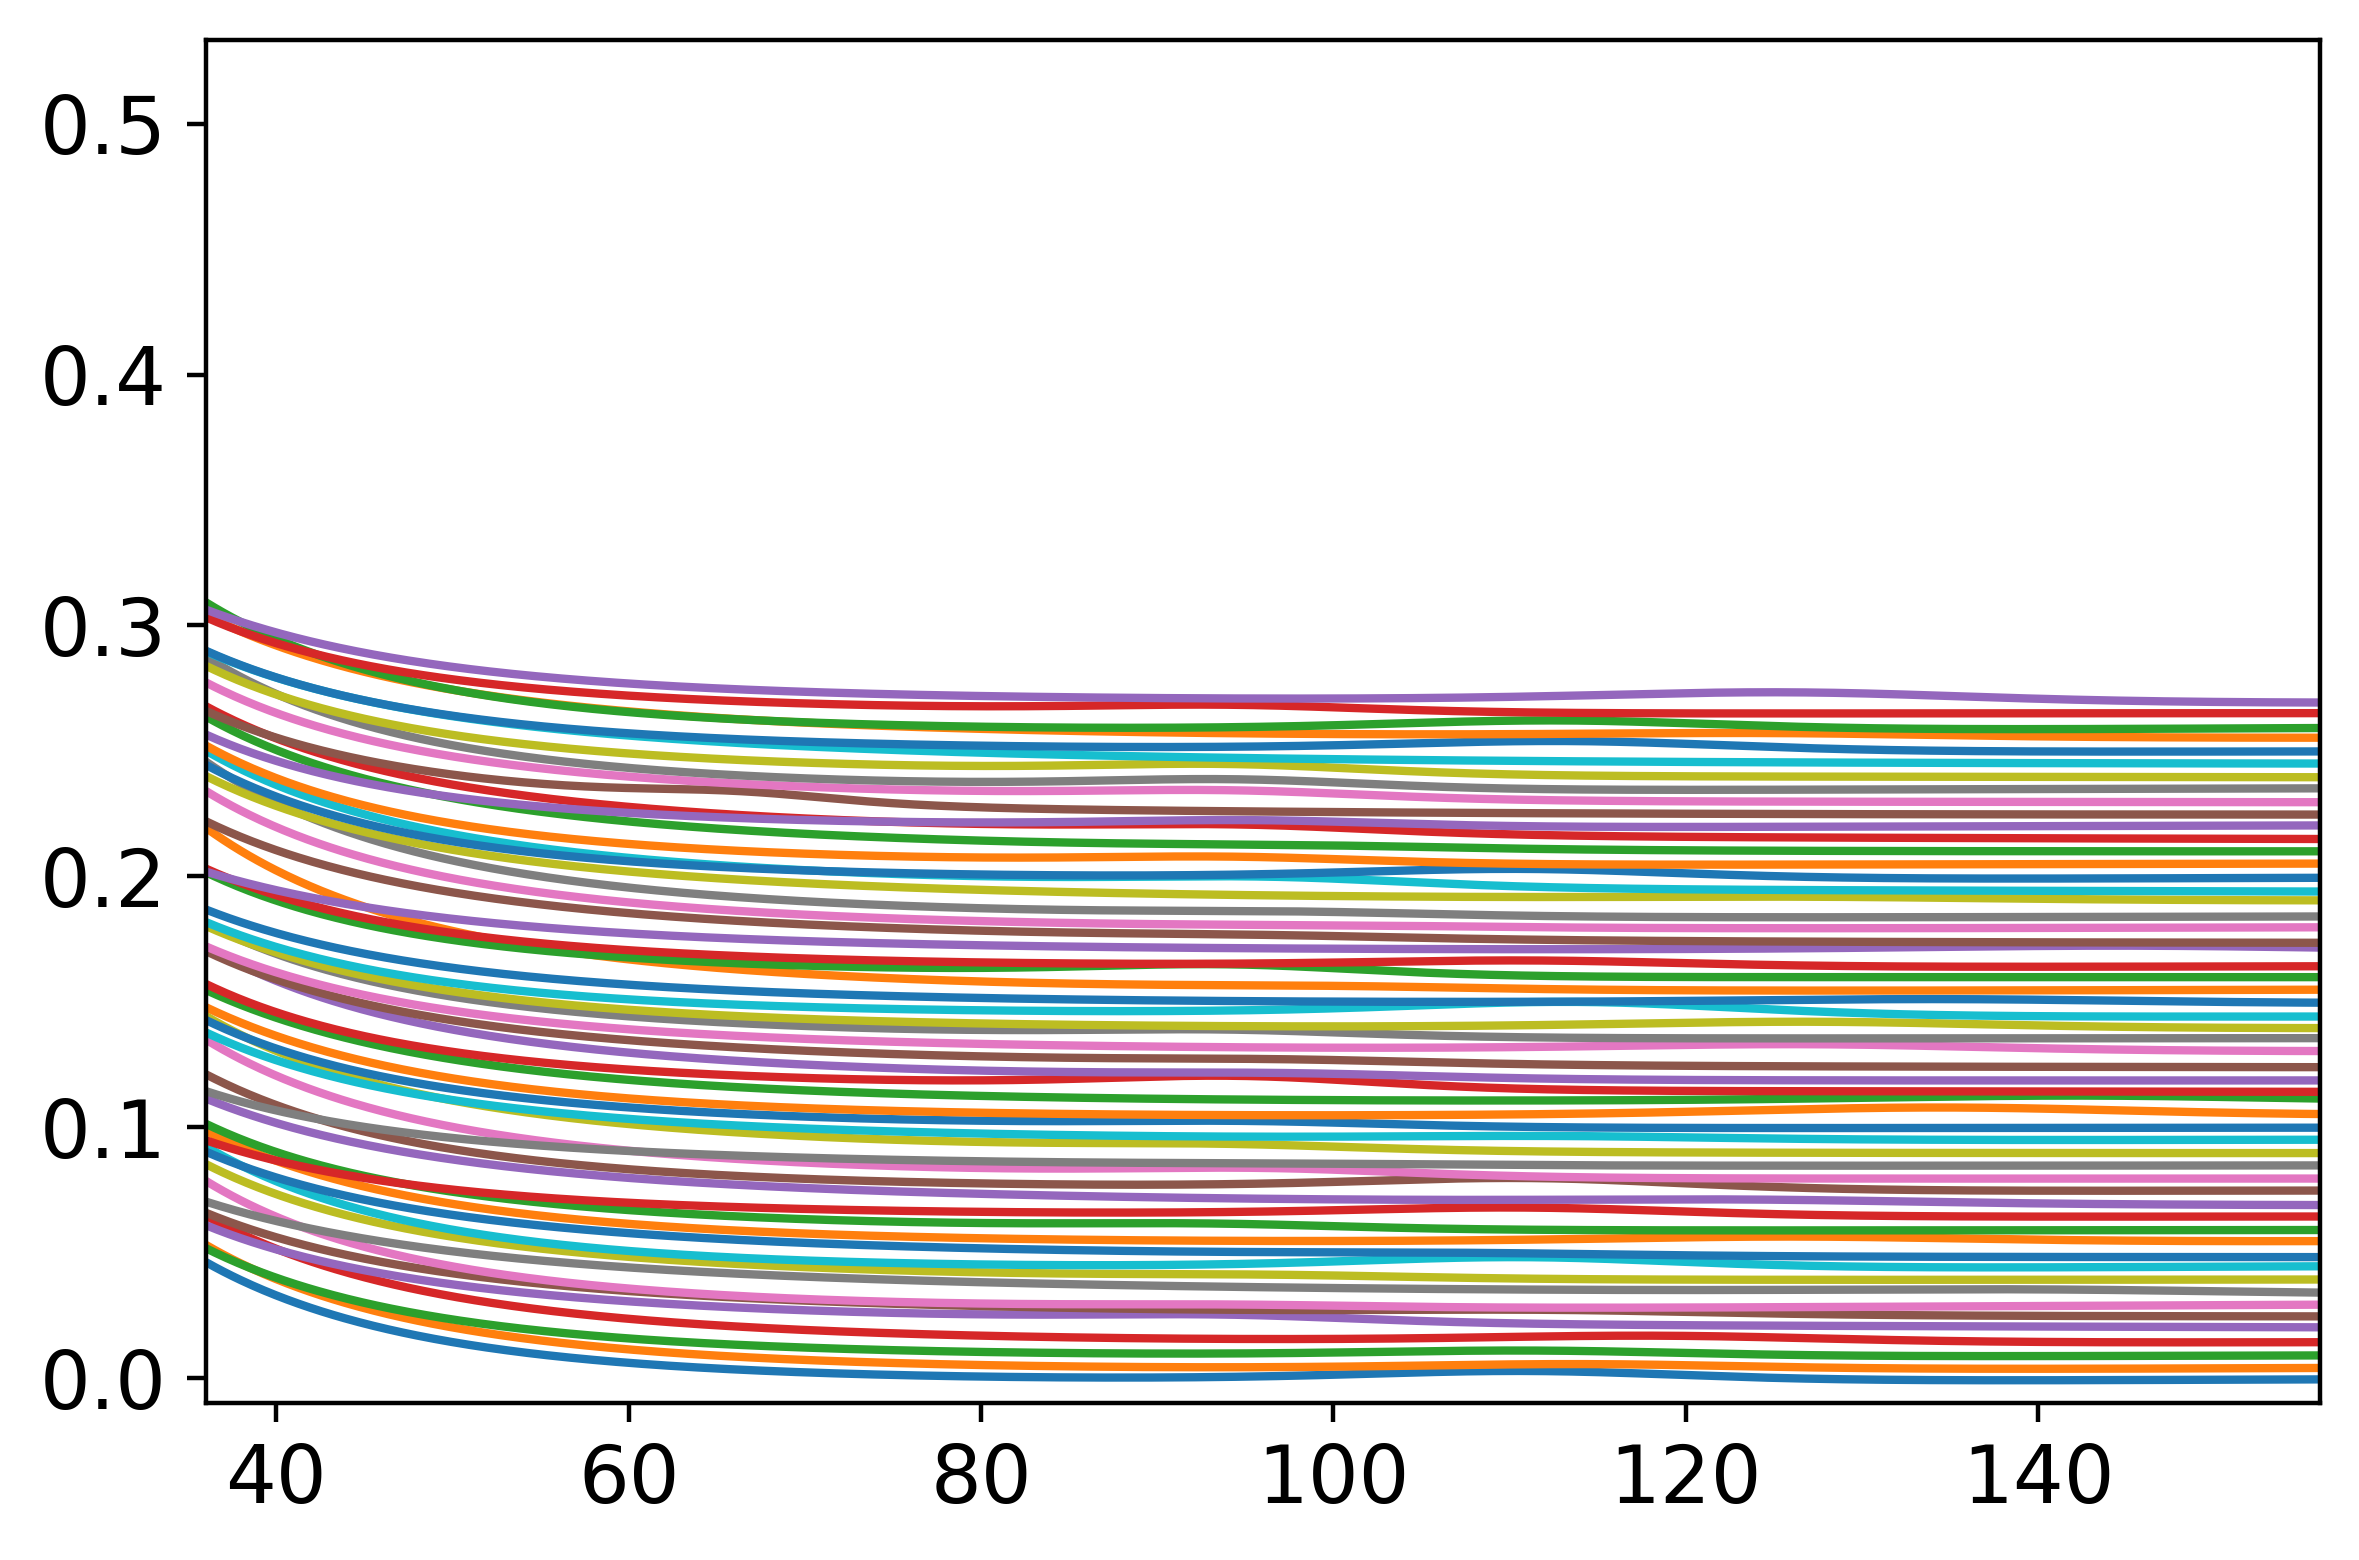

In [110]:
bws = [4]
r_widths = [14]
r_peak_arr, *_ = utils.find_peaks_center(r_arr, xi_arr, r_max_true, bws=bws, r_widths=r_widths, show_bad=True)

Tophat:

In [112]:
cat_tag = f'_L750_n2e-4_z057_patchy'
cf_tags = ['_tophat_bw8']
colors = [ctopmany, cspline, cbao]
labels = [ct[1:] for ct in cf_tags]

r_arr = []
xi_arr = []
for i, cf_tag in enumerate(cf_tags):
    rs, xis = utils.load_data(cat_tag, cf_tag)
    r_arr.append(rs)
    xi_arr.append(xis)

In [113]:
bws=[8]
r_widths = [8, 10, 12, 14, 16, 18, 20, 22]
n_bad = np.zeros((len(bws), len(r_widths), 3))
for i, bw in enumerate(bws):
    for j, r_width in enumerate(r_widths):
        if bw>=r_width:
            continue
        try:
            r_peak_arr, n_nans, n_botedge, n_topedge = utils.find_peaks_center(r_arr, xi_arr, r_max_true, bws=[bw], r_widths=[r_width], show_bad=False)
            n_bad[i][j] = (n_nans, n_botedge, n_topedge)
        except AssertionError:
            n_bad[i][j] = (0, 0, 0)

[8] [10]
[8] [12]
Number of NaNs: 46 , Bottom edges: 42 , Top edges: 2 total: 90
[8] [14]
Number of NaNs: 8 , Bottom edges: 16 , Top edges: 4 total: 28
[8] [16]
Number of NaNs: 8 , Bottom edges: 16 , Top edges: 4 total: 28
[8] [18]
Number of NaNs: 8 , Bottom edges: 16 , Top edges: 4 total: 28
[8] [20]
Number of NaNs: 7 , Bottom edges: 63 , Top edges: 0 total: 70
[8] [22]
Number of NaNs: 13 , Bottom edges: 121 , Top edges: 2 total: 136


([<matplotlib.axis.YTick at 0x7fb1907b25c0>,
 <a list of 8 Text yticklabel objects>)

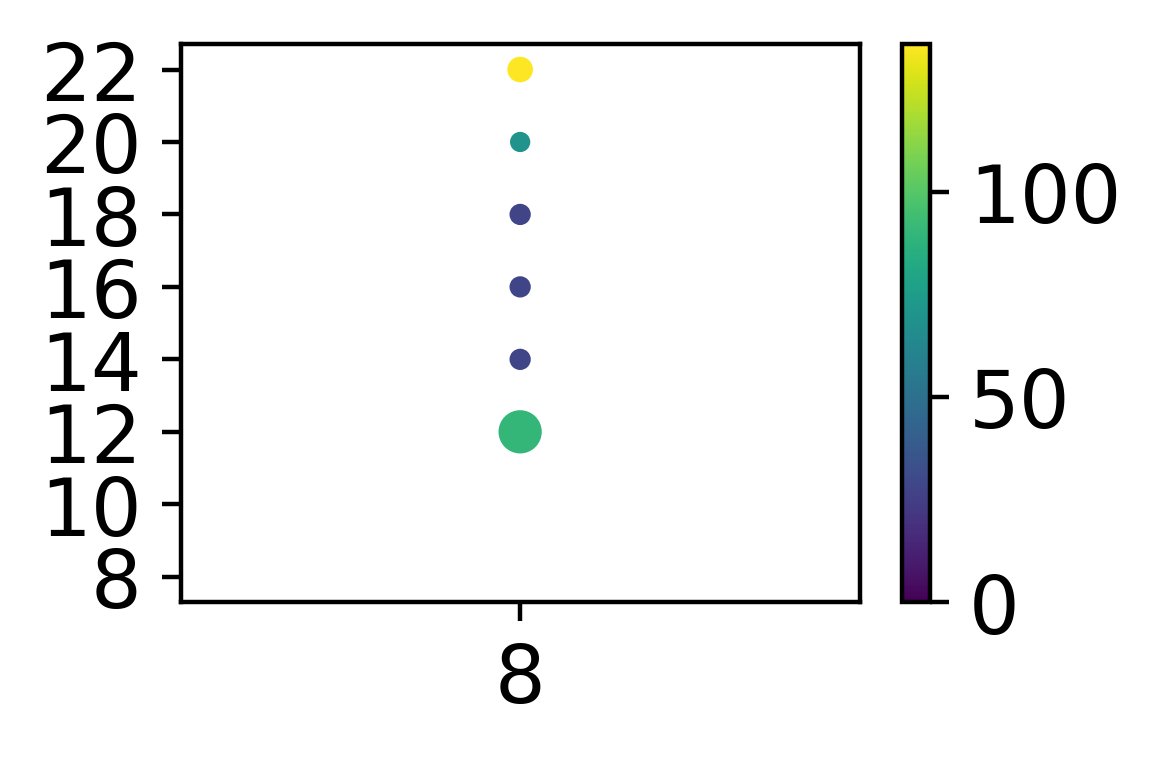

In [114]:
plt.figure(figsize=(3,2))

bw_vals = []
r_width_vals = []
bad_vals = []
nan_vals = []
for i, bw in enumerate(bws):
    for j, r_width in enumerate(r_widths):
        
        bad = np.sum(n_bad[i][j])
        nan = np.sum(n_bad[i][j][0])
        bw_vals.append(bw)
        r_width_vals.append(r_width)
        bad_vals.append(bad)
        nan_vals.append(nan)
        
scat = plt.scatter(bw_vals, r_width_vals, c=bad_vals, s=nan_vals)

fig = plt.gcf()
fig.colorbar(scat)

plt.xticks(bws)
plt.yticks(r_widths)

# best params

In [116]:
cat_tag = f'_L750_n2e-4_z057_patchy'
cf_tags = ['_tophat_bw8', '_spline3_bw8', f'_baoiter_cosmob17_adaptive2']
colors = [ctopmany, cspline, cbao]
labels = [ct[1:] for ct in cf_tags]

r_arr = []
xi_arr = []
for i, cf_tag in enumerate(cf_tags):
    rs, xis = utils.load_data(cat_tag, cf_tag)
    r_arr.append(rs)
    xi_arr.append(xis)

Number converged: 1000/1000


[8, 4, 4] [14.0, 14.0, 14.0]
Number of NaNs: 8 , Bottom edges: 16 , Top edges: 4 total: 28
Number of NaNs: 5 , Bottom edges: 18 , Top edges: 0 total: 23
Number of NaNs: 24 , Bottom edges: 24 , Top edges: 7 total: 55


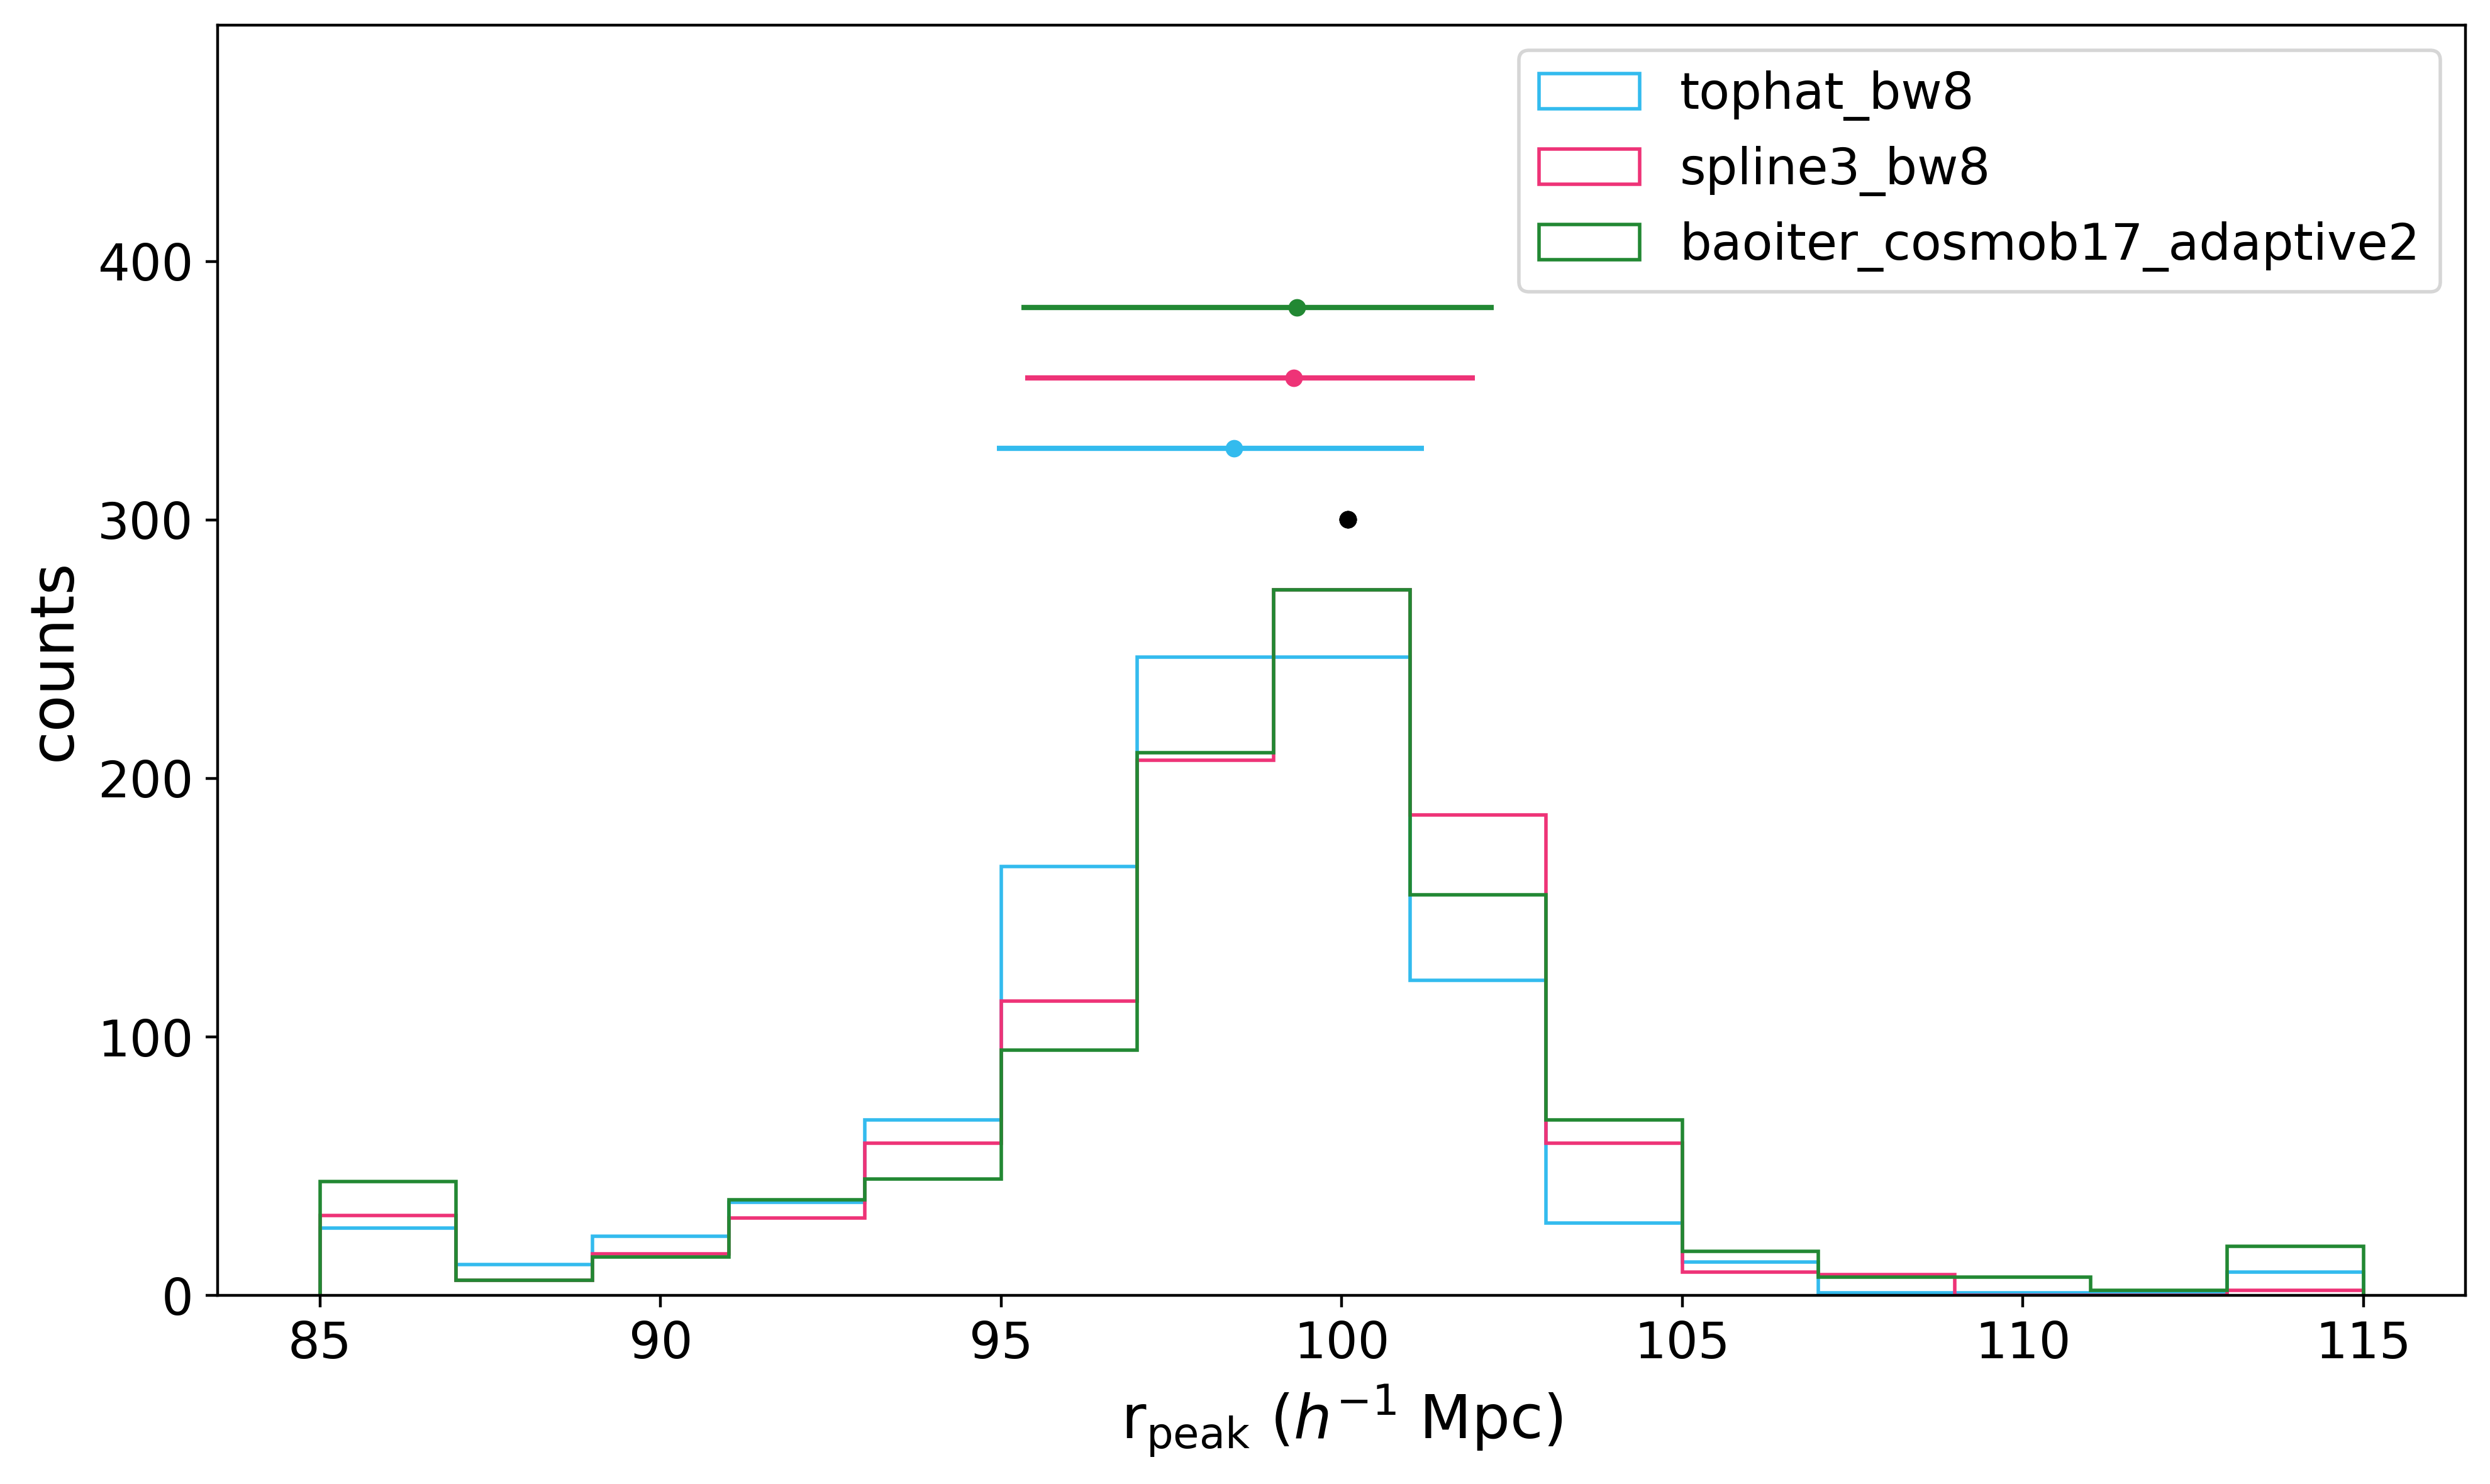

In [117]:
bws=[8, 4, 4]
r_widths = [14., 14., 14.]
r_peak_arr, *_ = utils.find_peaks_center(r_arr, xi_arr, r_max_true, bws=bws, r_widths=r_widths, show_bad=False)
ax = plot_histogram(r_peak_arr, labels=labels, colors=colors, r_max_true=r_max_true)

# now with r_max peak finding!

101.0010186 8 15
[1.0010186e+00 3.0010186e+00 5.0010186e+00 ... 9.9995001e+04 9.9997001e+04
 9.9999001e+04]
[ 95.0010186  97.0010186  99.0010186 101.0010186 103.0010186 105.0010186
 107.0010186]
8.0
Number of NaNs: 0 , Bottom edges: 0 , Top edges: 0 total: 0
True r_s: 102.79179254371591
Found peak: 100.3075595903227


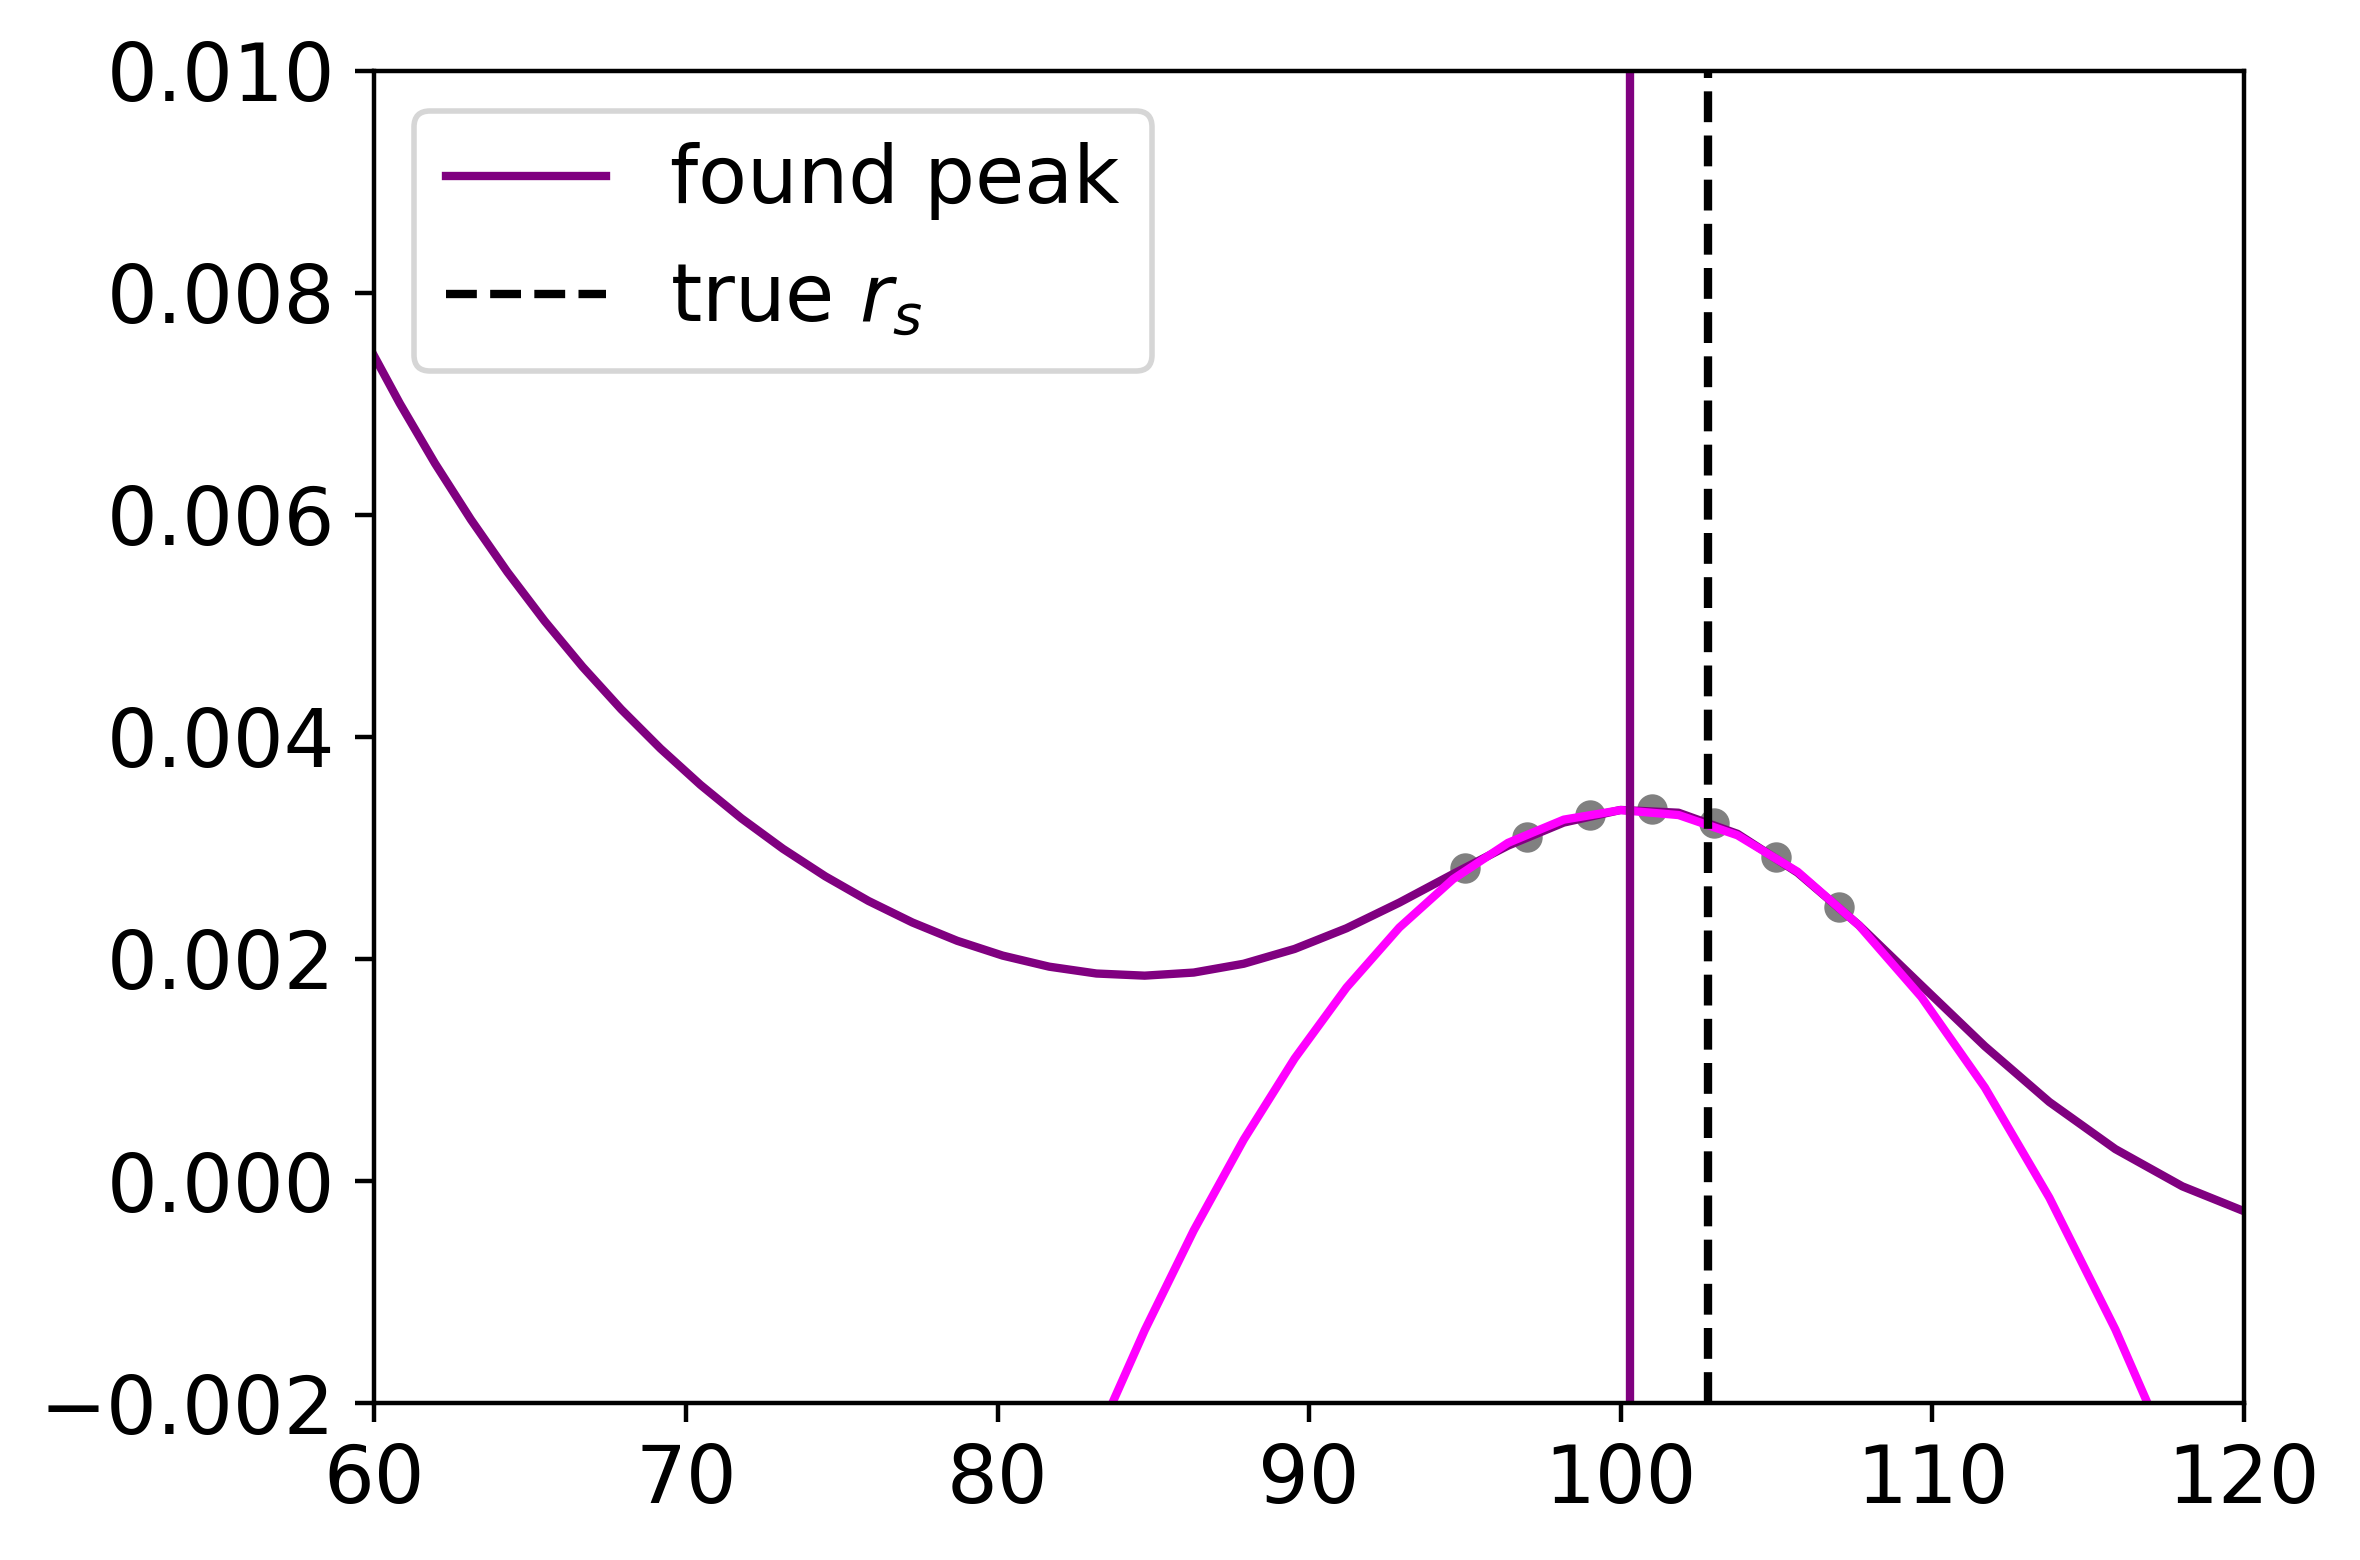

In [127]:
# truth same for all number densities, just choose one
cat_tag = '_L750_n1e-4_z057_patchy'
r_true, xi_true = utils.load_true(cat_tag, bias=2.0)
rpeak_guess = 100.0
bw = 2
r_peak_arr, bad_arrays, fit_arrays = utils.find_peaks_max([r_true], [xi_true], [bw], r_widths=[8.0], 
                                                             return_fit=True)
r_points, xi_points, popt = fit_arrays
r_max_true = r_peak_arr[0][0]

plt.figure()
color = 'purple'
plt.plot(r_true, xi_true, color=color)
plt.plot(r_true, utils.quadratic(r_true, *popt), color='magenta')
plt.scatter(r_points, xi_points, marker='o', s=20, color='grey')
plt.axvline(r_max_true, color=color, label='found peak')
plt.axvline(r_s*cosmo_patchy.h, color='black', ls='--', label='true $r_s$')

plt.legend()
plt.xlim(60, 120)
plt.ylim(-0.002, 0.01)

print("True r_s:", r_s*cosmo_patchy.h)
print("Found peak:", r_max_true)

104.0 2 4
[ 40.  48.  56.  64.  72.  80.  88.  96. 104. 112. 120. 128. 136. 144.
 152.]
[ 88.  96. 104. 112. 120.]
20.0
Number of NaNs: 0 , Bottom edges: 0 , Top edges: 0 total: 0


(-0.002, 0.01)

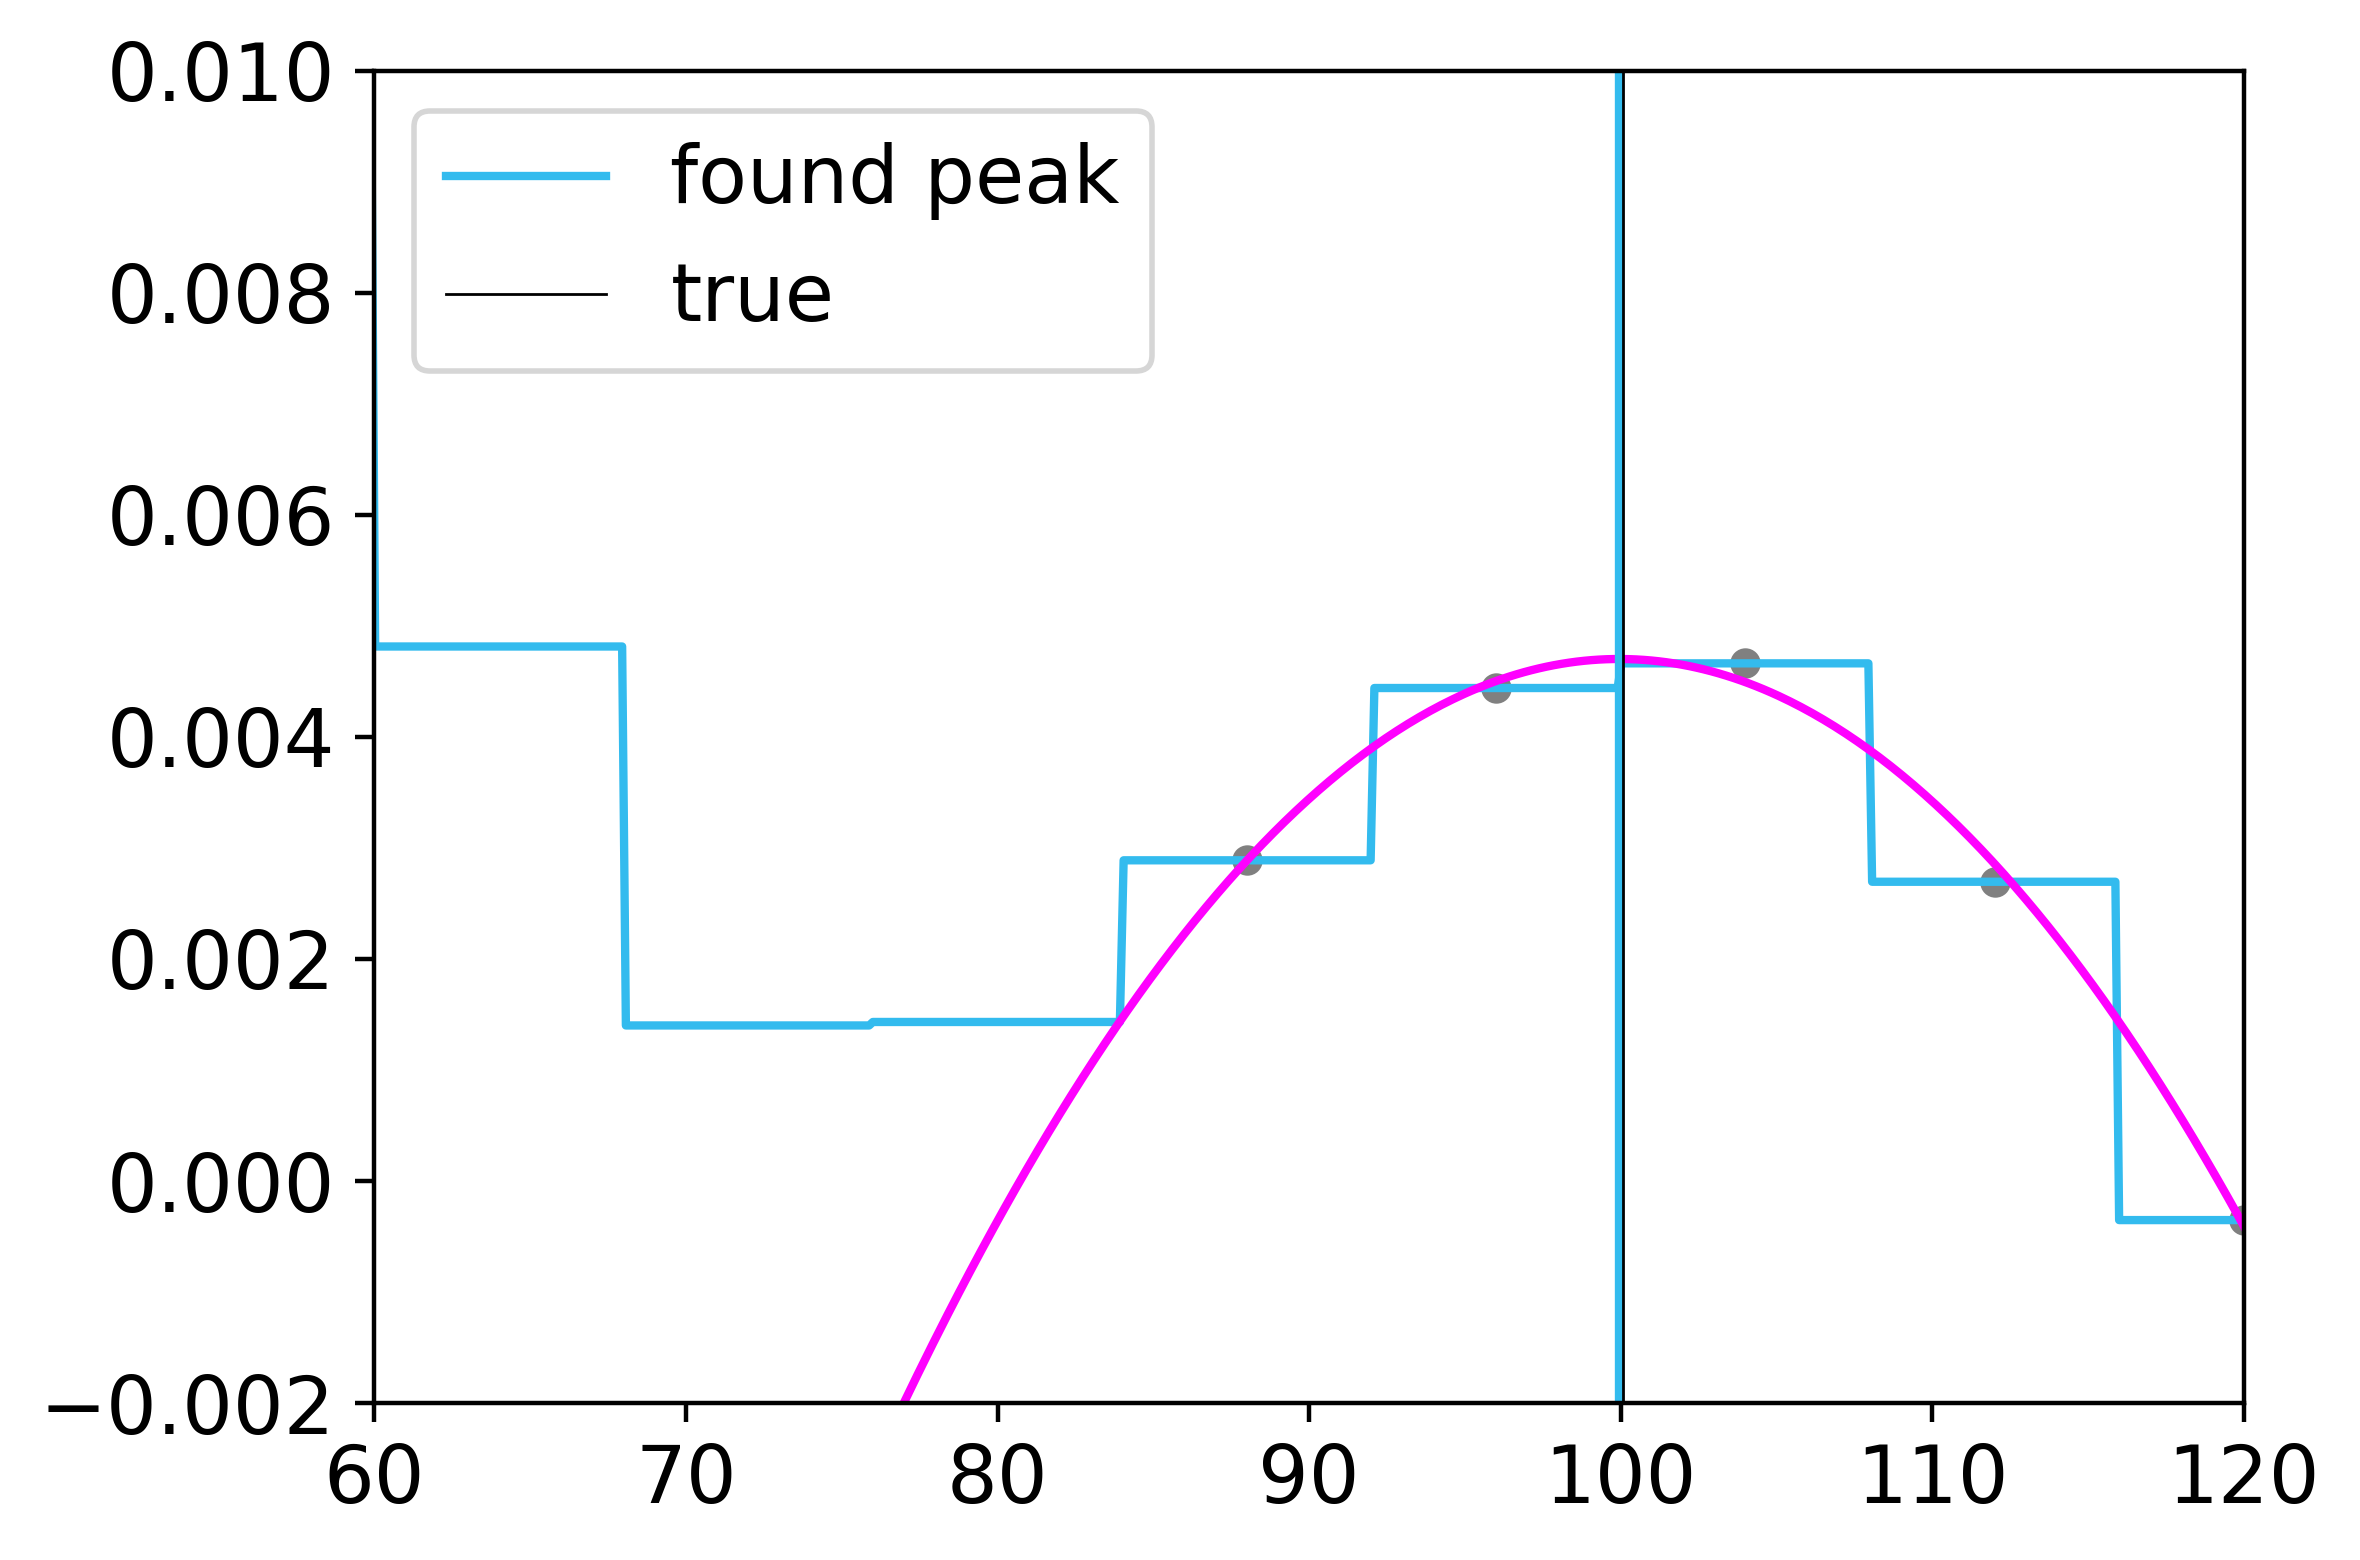

In [125]:
cat_tag = f'_L750_n2e-4_z057_patchy'
bw = 8
cf_tag = f'_tophat_bw{bw}'

n = 0 #first realization
color = ctopmany
rs, xis = utils.load_data(cat_tag, cf_tag)
rn = rs[n]
xin = xis[n]
r_peak_arr,  = utils.find_peaks_max([rn], [xin], bws=[bw], r_widths=[20.0], return_fit=True)
r_points, xi_points, popt = fit_arrays

plt.figure()
plt.plot(rn, xin, color=color)
plt.plot(rn, utils.quadratic(rn, *popt), color='magenta')
plt.scatter(r_points, xi_points, marker='o', s=20, color='grey')
plt.axvline(r_peak_arr[0], color=color, label='found peak')
plt.axvline(r_max_true, color='k', lw=0.5, label='true')
plt.legend()
plt.xlim(60, 120)
plt.ylim(-0.002, 0.01)

In [134]:
cat_tag = f'_L750_n2e-4_z057_patchy'
cf_tags = ['_tophat_bw8', '_spline3_bw8', '_baoiter_cosmob17_adaptive2']
colors = [ctopmany, cspline, cbao]
labels = [ct[1:] for ct in cf_tags]

r_arr = []
xi_arr = []
for i, cf_tag in enumerate(cf_tags):
    rs, xis = utils.load_data(cat_tag, cf_tag)
    r_arr.append(rs)
    xi_arr.append(xis)

Number converged: 1000/1000


Number of NaNs: 98 , Bottom edges: 0 , Top edges: 0 total: 98
Number of NaNs: 68 , Bottom edges: 6 , Top edges: 0 total: 74
Number of NaNs: 71 , Bottom edges: 3 , Top edges: 0 total: 74


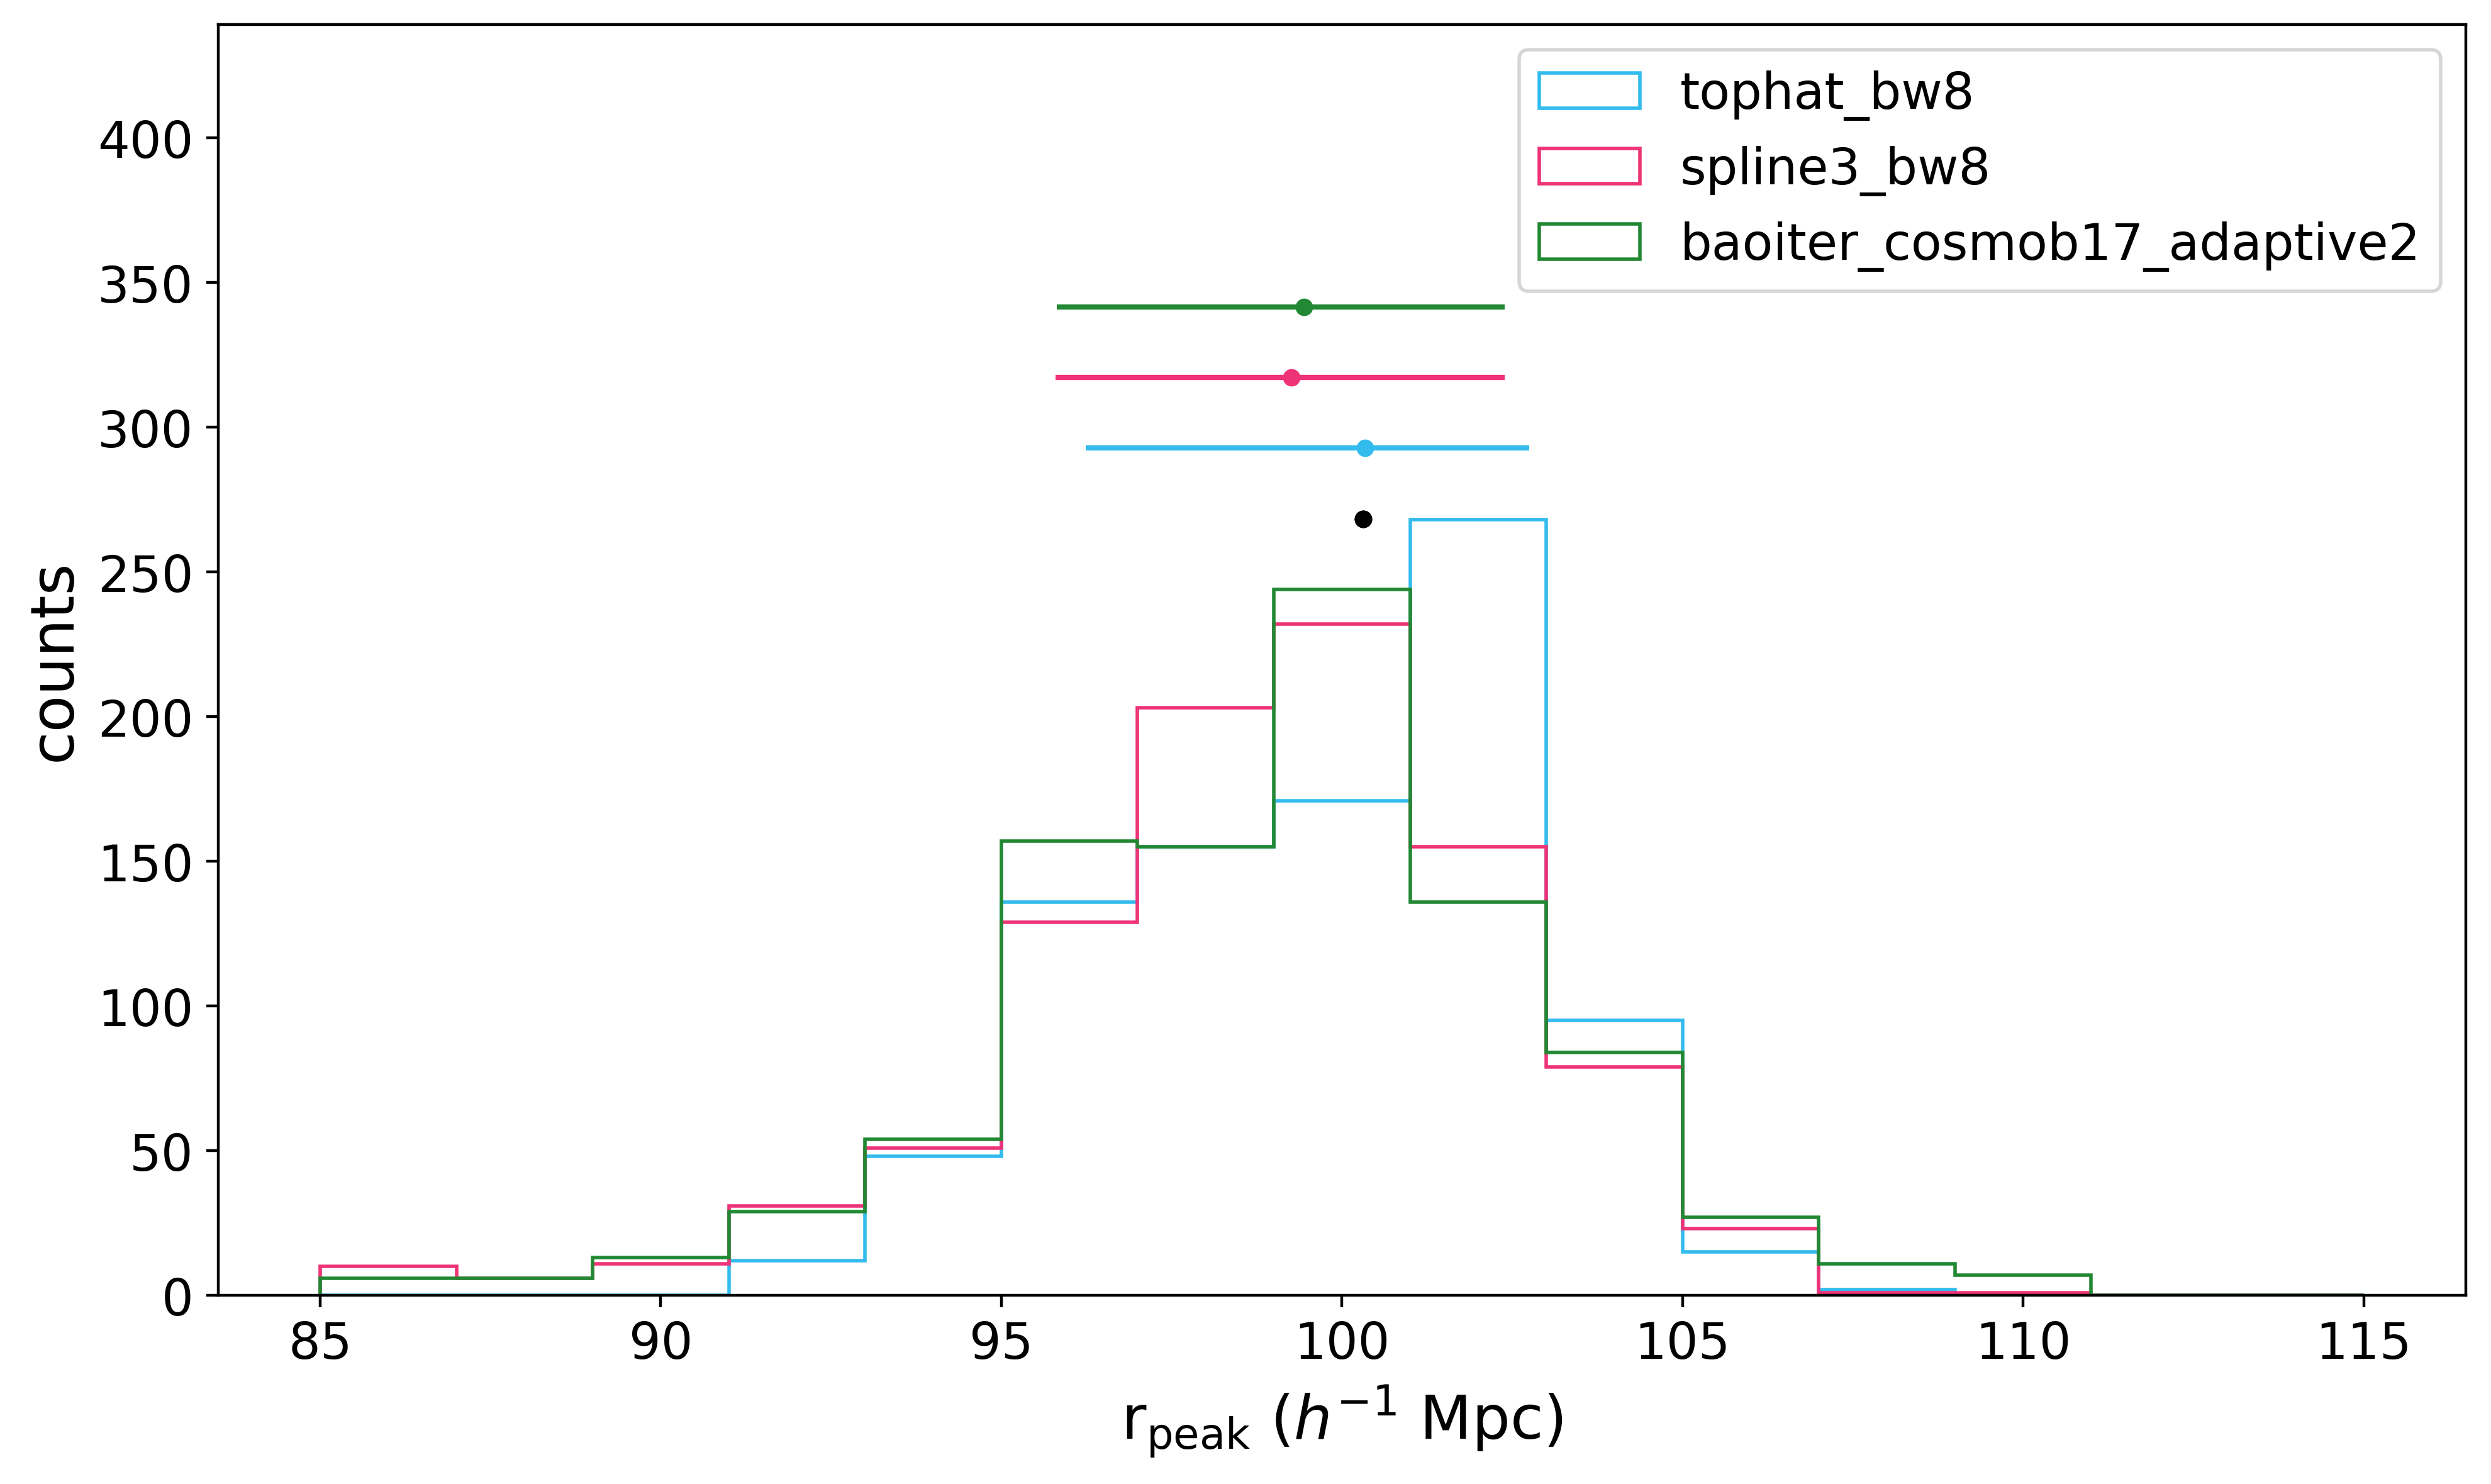

In [138]:
bws=[8, 4, 4]
r_widths = [14., 14., 14.]
r_peak_arr, *_ = utils.find_peaks_max(r_arr, xi_arr, bws=bws, r_widths=r_widths, show_bad=False)
ax = plot_histogram(r_peak_arr, labels=labels, colors=colors, r_max_true=r_max_true)

find better spline params

In [139]:
cat_tag = f'_L750_n2e-4_z057_patchy'
cf_tags = ['_spline3_bw8']
colors = [ctopmany, cspline, cbao]
labels = [ct[1:] for ct in cf_tags]

r_arr = []
xi_arr = []
for i, cf_tag in enumerate(cf_tags):
    rs, xis = utils.load_data(cat_tag, cf_tag)
    r_arr.append(rs)
    xi_arr.append(xis)

In [143]:
bws=[2, 4, 6, 8]
r_widths = [8, 10, 12, 14, 16]
n_bad = np.zeros((len(bws), len(r_widths), 3))
for i, bw in enumerate(bws):
    for j, r_width in enumerate(r_widths):
        if bw>=r_width:
            continue
        try:
            r_peak_arr, [n_nans, n_botedge, n_topedge] = utils.find_peaks_max(r_arr, xi_arr, bws=[bw], r_widths=[r_width], show_bad=False)
            n_bad[i][j] = (n_nans, n_botedge, n_topedge)
        except AssertionError:
            n_bad[i][j] = (0, 0, 0)

2 8
Number of NaNs: 60 , Bottom edges: 0 , Top edges: 0 total: 60
2 10
Number of NaNs: 60 , Bottom edges: 0 , Top edges: 0 total: 60
2 12
Number of NaNs: 60 , Bottom edges: 0 , Top edges: 0 total: 60
2 14
Number of NaNs: 60 , Bottom edges: 1 , Top edges: 0 total: 61
2 16
Number of NaNs: 60 , Bottom edges: 6 , Top edges: 0 total: 66
4 8
Number of NaNs: 68 , Bottom edges: 0 , Top edges: 0 total: 68
4 10
Number of NaNs: 68 , Bottom edges: 0 , Top edges: 0 total: 68
4 12
Number of NaNs: 68 , Bottom edges: 0 , Top edges: 0 total: 68
4 14
Number of NaNs: 68 , Bottom edges: 6 , Top edges: 0 total: 74
4 16
Number of NaNs: 68 , Bottom edges: 6 , Top edges: 0 total: 74
6 8
Number of NaNs: 71 , Bottom edges: 0 , Top edges: 0 total: 71
6 10
Number of NaNs: 71 , Bottom edges: 0 , Top edges: 0 total: 71
6 12
Number of NaNs: 71 , Bottom edges: 0 , Top edges: 0 total: 71
6 14
Number of NaNs: 71 , Bottom edges: 12 , Top edges: 0 total: 83
6 16
Number of NaNs: 71 , Bottom edges: 12 , Top edges: 0 total:

([<matplotlib.axis.YTick at 0x7fb1902809b0>,
 <a list of 5 Text yticklabel objects>)

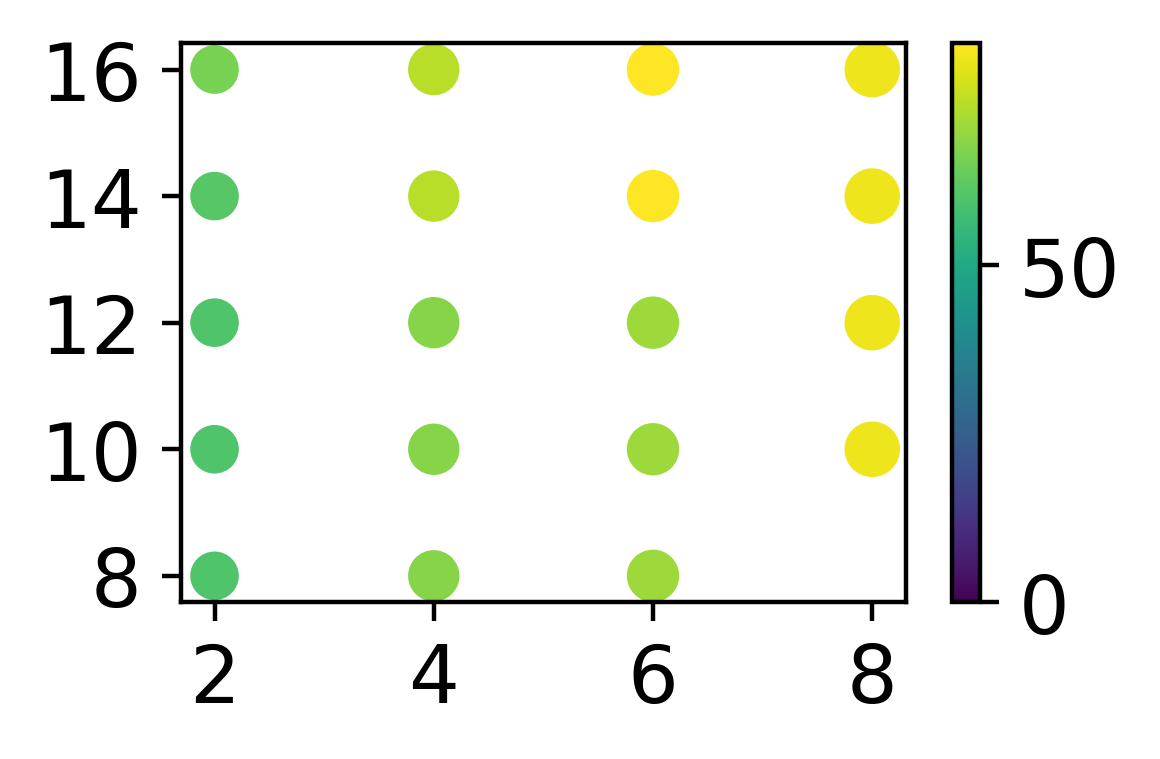

In [142]:
plt.figure(figsize=(3,2))

bw_vals = []
r_width_vals = []
bad_vals = []
nan_vals = []
for i, bw in enumerate(bws):
    for j, r_width in enumerate(r_widths):
        
        bad = np.sum(n_bad[i][j])
        nan = np.sum(n_bad[i][j][0])
        bw_vals.append(bw)
        r_width_vals.append(r_width)
        bad_vals.append(bad)
        nan_vals.append(nan)
        
scat = plt.scatter(bw_vals, r_width_vals, c=bad_vals, s=nan_vals)

fig = plt.gcf()
fig.colorbar(scat)

plt.xticks(bws)
plt.yticks(r_widths)

4 14
Number of NaNs: 68 , Bottom edges: 6 , Top edges: 0 total: 74


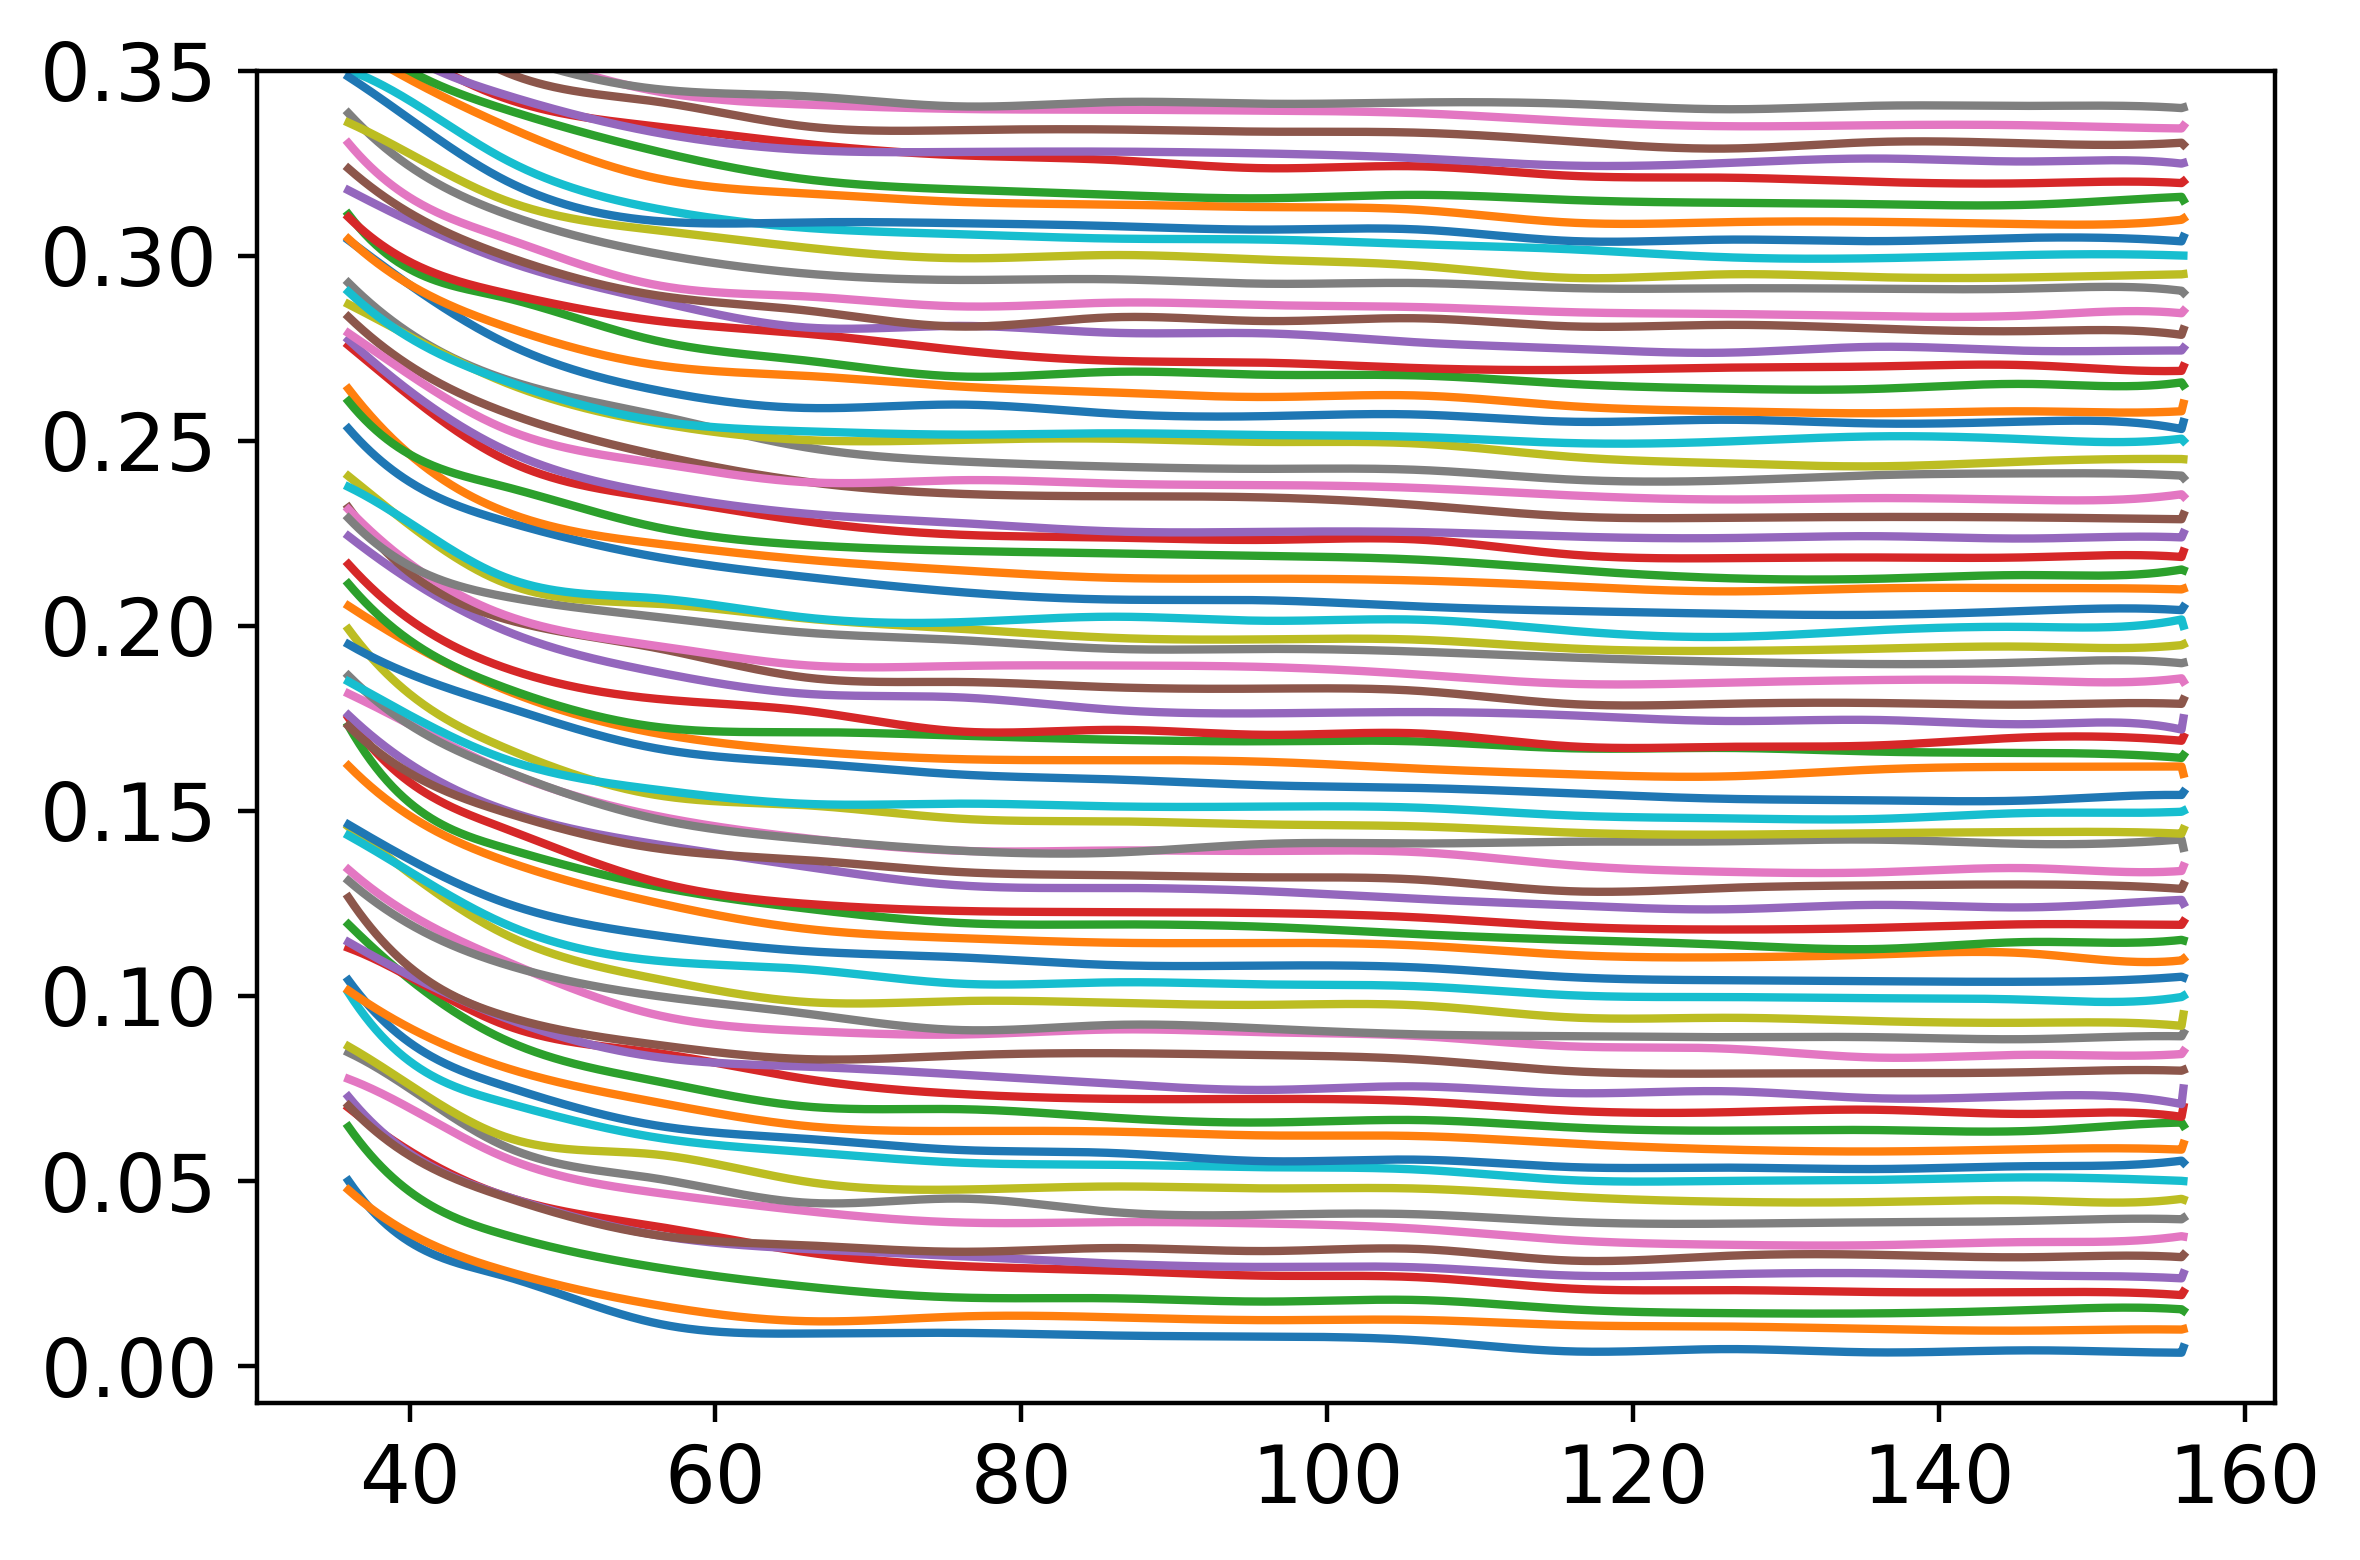

In [148]:
bw = 4
r_width = 14
r_peak_arr, [n_nans, n_botedge, n_topedge] = utils.find_peaks_max(r_arr, xi_arr, bws=[bw], r_widths=[r_width], show_bad=True)

In [150]:
cat_tag = f'_L750_n2e-4_z057_patchy'
cf_tags = ['_tophat_bw8', '_spline3_bw8', '_baoiter_cosmob17_adaptive2']
colors = [ctopmany, cspline, cbao]
labels = [ct[1:] for ct in cf_tags]

r_arr = []
xi_arr = []
for i, cf_tag in enumerate(cf_tags):
    rs, xis = utils.load_data(cat_tag, cf_tag)
    r_arr.append(rs)
    xi_arr.append(xis)

Number converged: 1000/1000


8 14.0
Number of NaNs: 98 , Bottom edges: 0 , Top edges: 0 total: 98
2 12.0
Number of NaNs: 60 , Bottom edges: 0 , Top edges: 0 total: 60
4 14.0
Number of NaNs: 71 , Bottom edges: 3 , Top edges: 0 total: 74


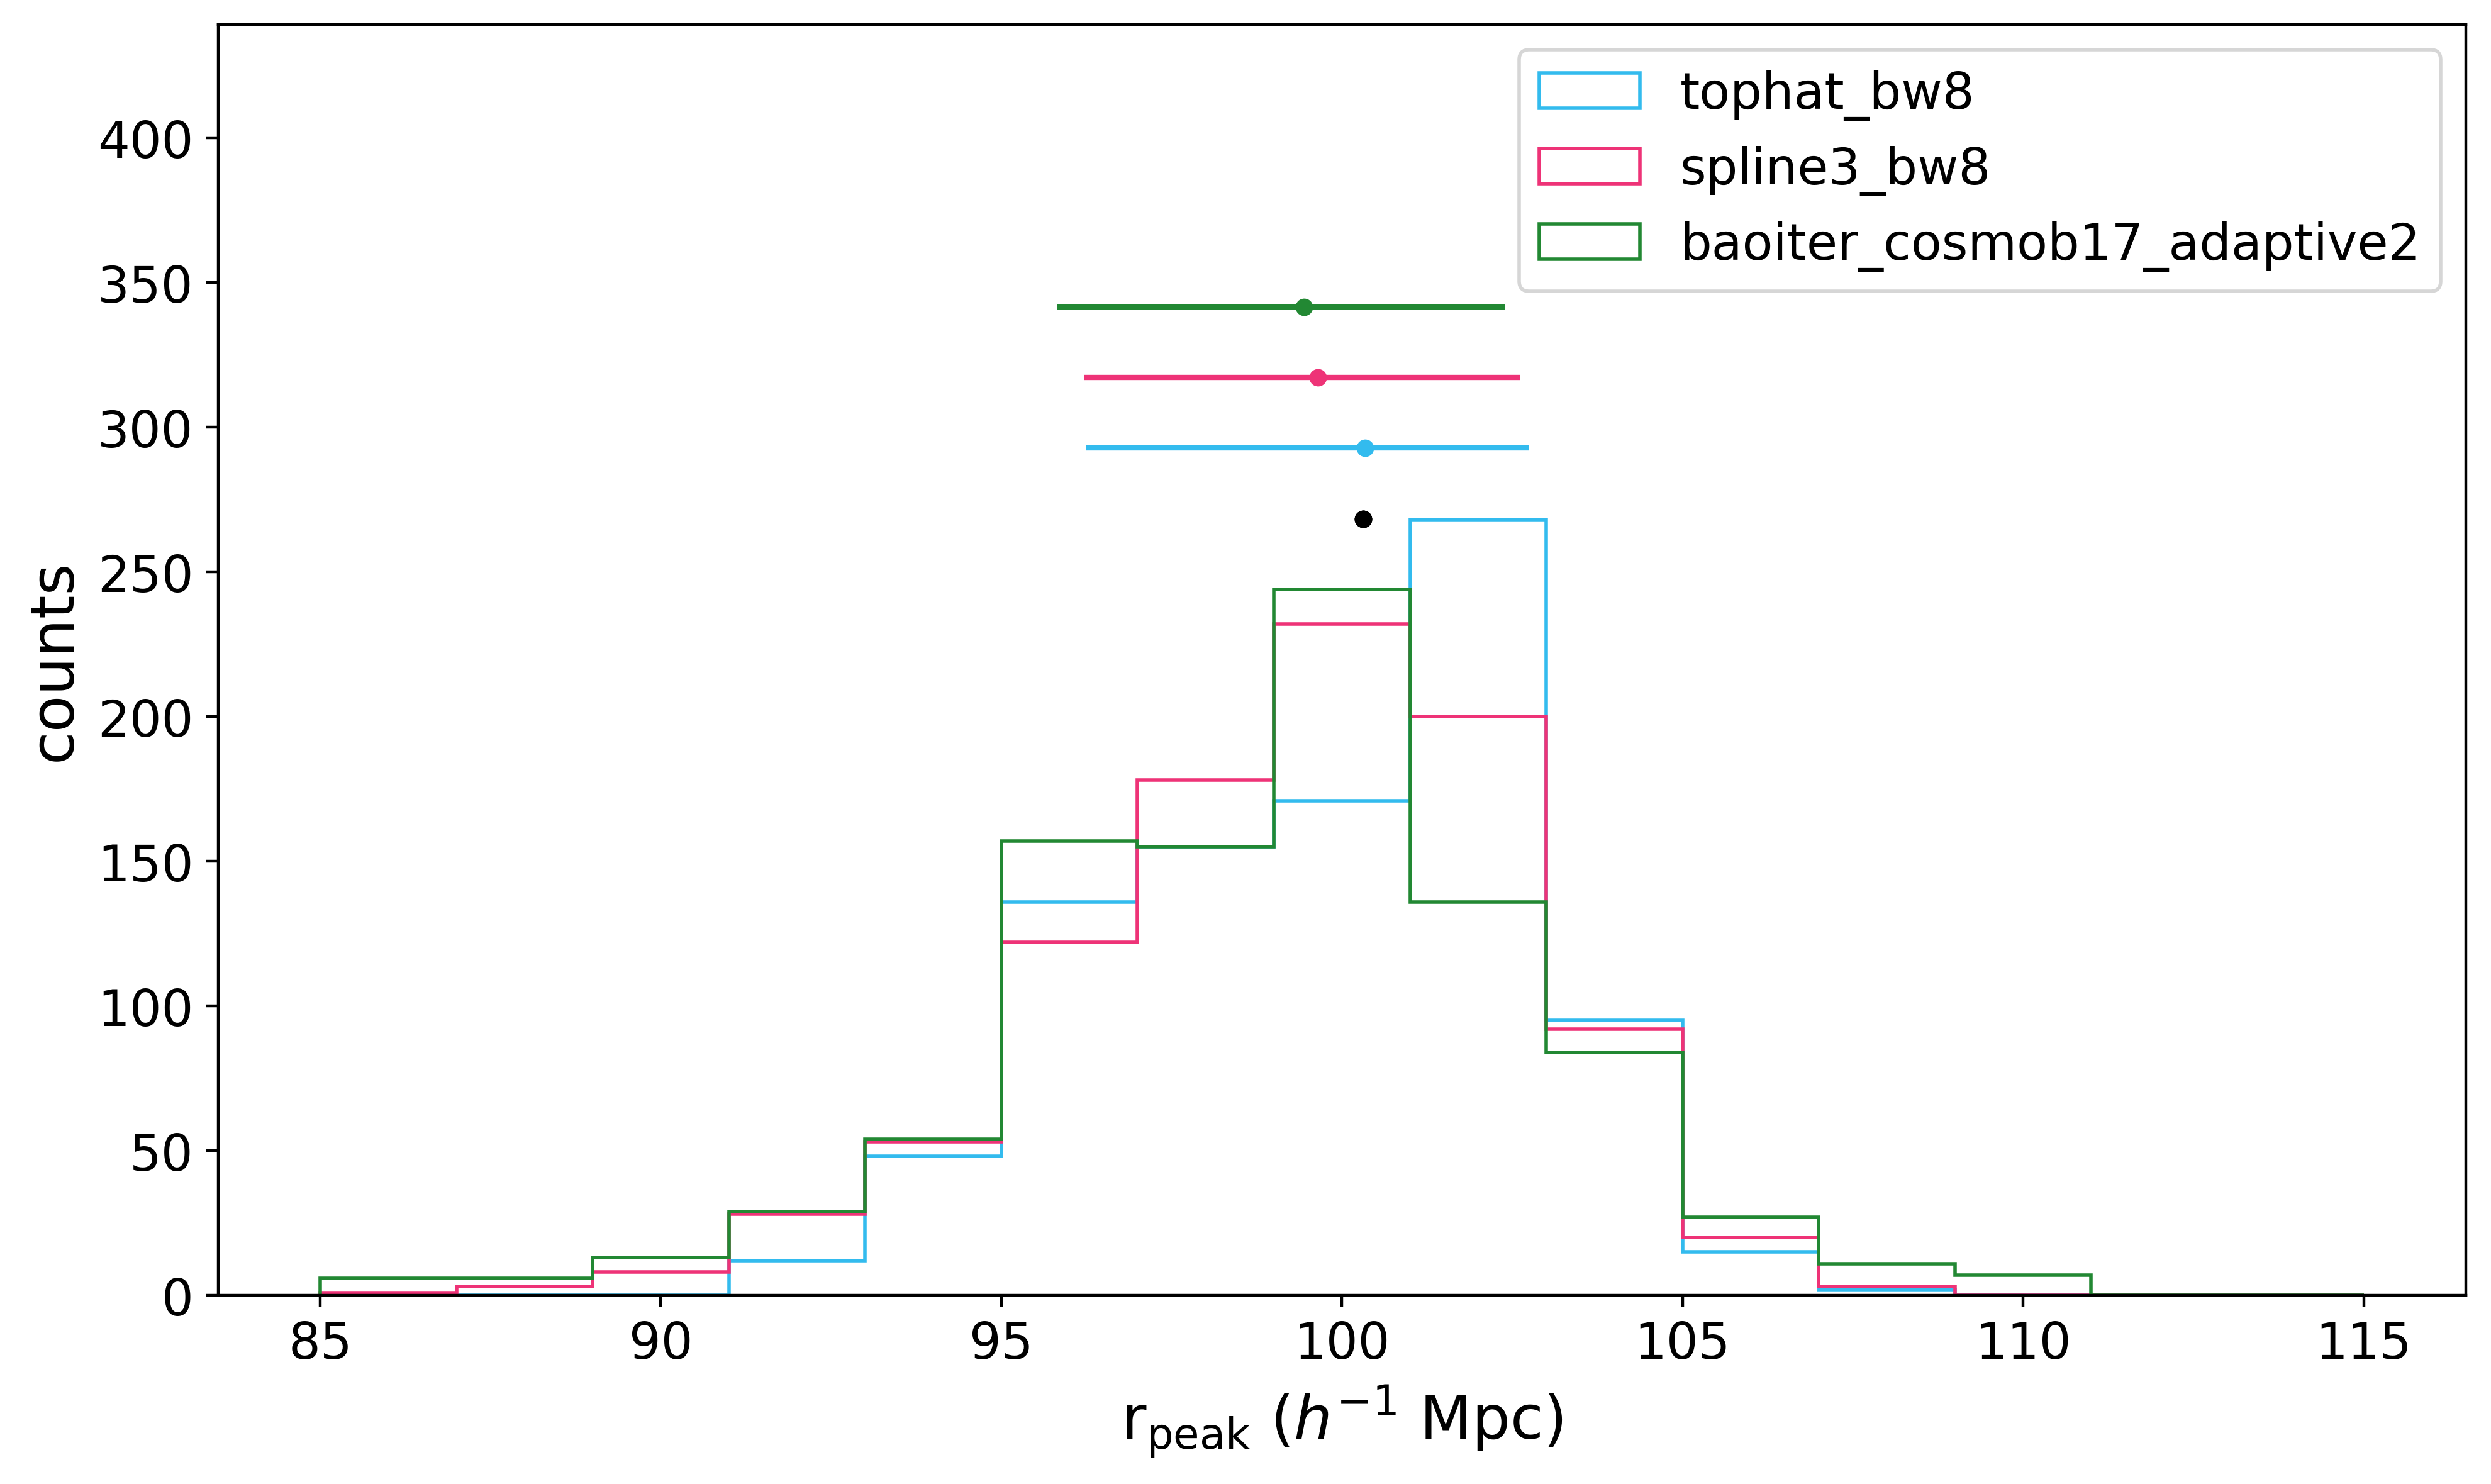

In [151]:
bws=[8, 2, 4]
r_widths = [14., 12., 14.]
r_peak_arr, *_ = utils.find_peaks_max(r_arr, xi_arr, bws=bws, r_widths=r_widths, show_bad=False)
ax = plot_histogram(r_peak_arr, labels=labels, colors=colors, r_max_true=r_max_true)